# **Understand Trump Impact on QQQ and Develop An Effective Strategy**

Donald Trump’s presidency has introduced notable volatility to financial markets, particularly impacting the tech-focused NASDAQ-100 Index, which the QQQ ETF closely tracks. As a widely traded exchange-traded fund, QQQ is sensitive to Trump’s policy decisions, trade disputes, and regulatory changes. This analysis seeks to evaluate Trump’s influence on QQQ and formulate a robust investment approach through a three-part framework.

Reference: 
- Sample: https://alsa9.github.io/
- EDA: https://github.com/VenkyAdi/EDA---Projects/blob/main/Banking-Fraud-Analysis-Paisabazzar/Paisabazaar-EDA.ipynb

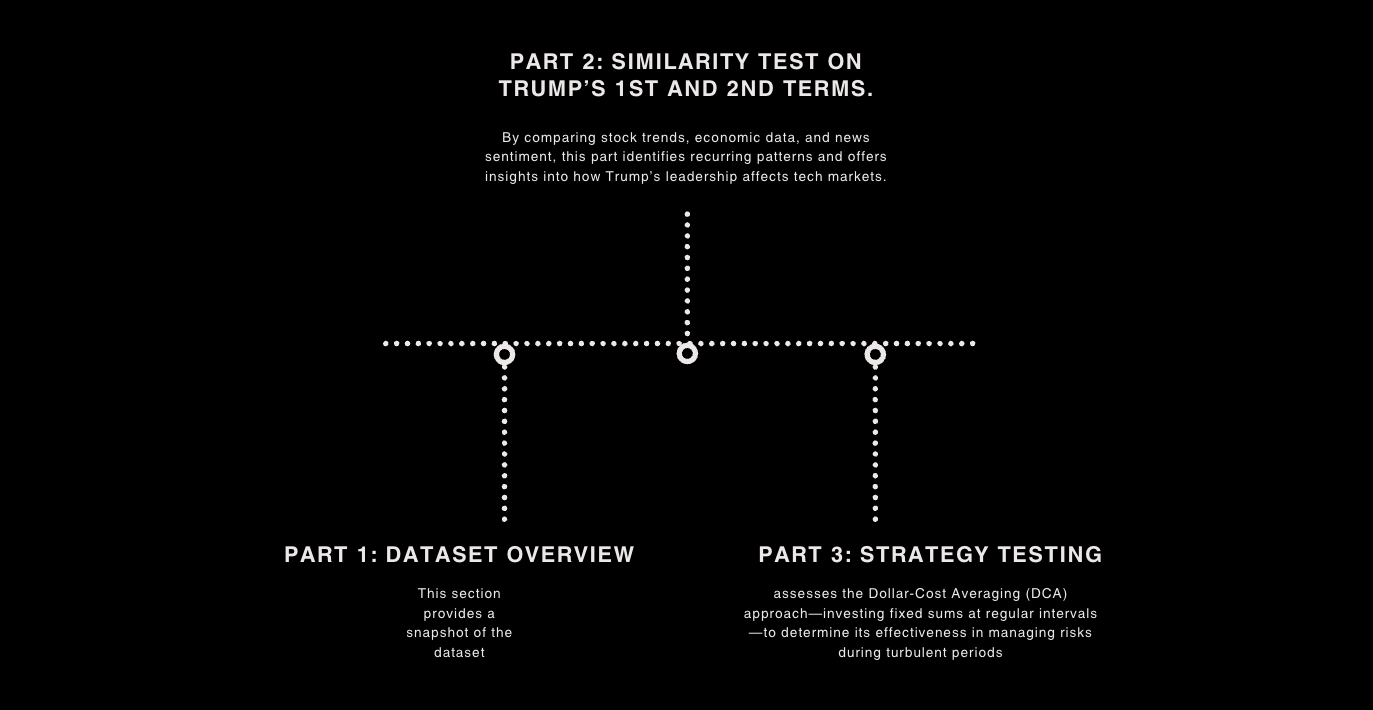

# **Part 1: Dataset Current Situation**
This section connects to an SQLite database, retrieves a joined dataset of stock prices, macroeconomic indicators, and news titles, and provides a brief analysis of its current state.

# Import Libraries

In [21]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Dataset Loading and Table Join

In [22]:
conn = sqlite3.connect('/Users/kevinleungch421/Documents/GitHub/Database/DataBase/stock_price.sqlite')

query = """
SELECT 
    s.date, s.open, s.high, s.low, s.close, s.volume, s.ticker, s.month_year,
    m.Release_Date, m.Unemployment_Actual, m.Unemployment_Predicted,
    m.CPI_Actual, m.CPI_Predicted, m.Nonfarm_Payrolls_Actual, m.Nonfarm_Payrolls_Predicted,
    m.Retail_Sales_Actual, m.Retail_Sales_Predicted, m.Industrial_Production_Actual,
    m.Industrial_Production_Predicted, m.Consumer_Confidence_Index_Actual,
    m.Consumer_Confidence_Index_Predicted, m.Personal_Income_Actual, m.Personal_Income_Predicted,
    n.titles
FROM stock_data s
LEFT JOIN macro_data m ON s.month_year = m.month_year
LEFT JOIN (
    SELECT date, GROUP_CONCAT(title, ', ') AS titles, month_year, ticker
    FROM news_data
    GROUP BY date, month_year, ticker
) n ON s.date = n.date AND s.ticker = n.ticker
"""

trump_term_data = pd.read_sql(query, conn)
conn.close()

# Dataset First View

In [23]:
trump_term_data.head()

,date,open,high,low,close,volume,ticker,month_year,Release_Date,Unemployment_Actual,...,Nonfarm_Payrolls_Predicted,Retail_Sales_Actual,Retail_Sales_Predicted,Industrial_Production_Actual,Industrial_Production_Predicted,Consumer_Confidence_Index_Actual,Consumer_Confidence_Index_Predicted,Personal_Income_Actual,Personal_Income_Predicted,titles
0,2016-01-04,102.162982,102.302996,100.921537,102.209656,50807600,QQQ,2016-01,None,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"After Hours Most Active for Jan 4, 2016 : WSH,..."
1,2016-01-05,102.713696,102.844374,101.556255,102.032295,38795200,QQQ,2016-01,None,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"After Hours Most Active for Jan 5, 2016 : FIG,..."
2,2016-01-06,100.258794,101.640253,100.258794,101.052200,41891100,QQQ,2016-01,None,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"ADP Report Buried Under China, N. Korea News, ..."
3,2016-01-07,98.895983,100.146771,97.831884,97.887894,61386300,QQQ,2016-01,None,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Can These Growth ETFs Winners of 2015 Shine in...
4,2016-01-08,98.597297,99.213359,96.982482,97.085159,69344000,QQQ,2016-01,None,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"After Hours Most Active for Jan 8, 2016 : QQQ,..."


# Dataset Rows & Columns count

In [24]:
print(f"Number of Rows: {trump_term_data.shape[0]}")
print(f"Number of Columns: {trump_term_data.shape[1]}")

Number of Rows: 2333
Number of Columns: 24


# Dataset Information

In [25]:
trump_term_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2333 entries, 0 to 2332
Data columns (total 24 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   date                                 2333 non-null   object 
 1   open                                 2333 non-null   float64
 2   high                                 2333 non-null   float64
 3   low                                  2333 non-null   float64
 4   close                                2333 non-null   float64
 5   volume                               2333 non-null   int64  
 6   ticker                               2333 non-null   object 
 7   month_year                           2333 non-null   object 
 8   Release_Date                         2038 non-null   object 
 9   Unemployment_Actual                  2038 non-null   float64
 10  Unemployment_Predicted               2038 non-null   float64
 11  CPI_Actual                    

# Duplicate Values

In [26]:
trump_term_data.duplicated().sum()

0

# Missing Values/Null Values

In [27]:
trump_term_data.isnull().sum()

date                                     0
open                                     0
high                                     0
low                                      0
close                                    0
volume                                   0
ticker                                   0
month_year                               0
Release_Date                           295
Unemployment_Actual                    295
Unemployment_Predicted                 295
CPI_Actual                             295
CPI_Predicted                          295
Nonfarm_Payrolls_Actual                295
Nonfarm_Payrolls_Predicted             295
Retail_Sales_Actual                    304
Retail_Sales_Predicted                 295
Industrial_Production_Actual           304
Industrial_Production_Predicted        295
Consumer_Confidence_Index_Actual       295
Consumer_Confidence_Index_Predicted    295
Personal_Income_Actual                 304
Personal_Income_Predicted              304
titles     

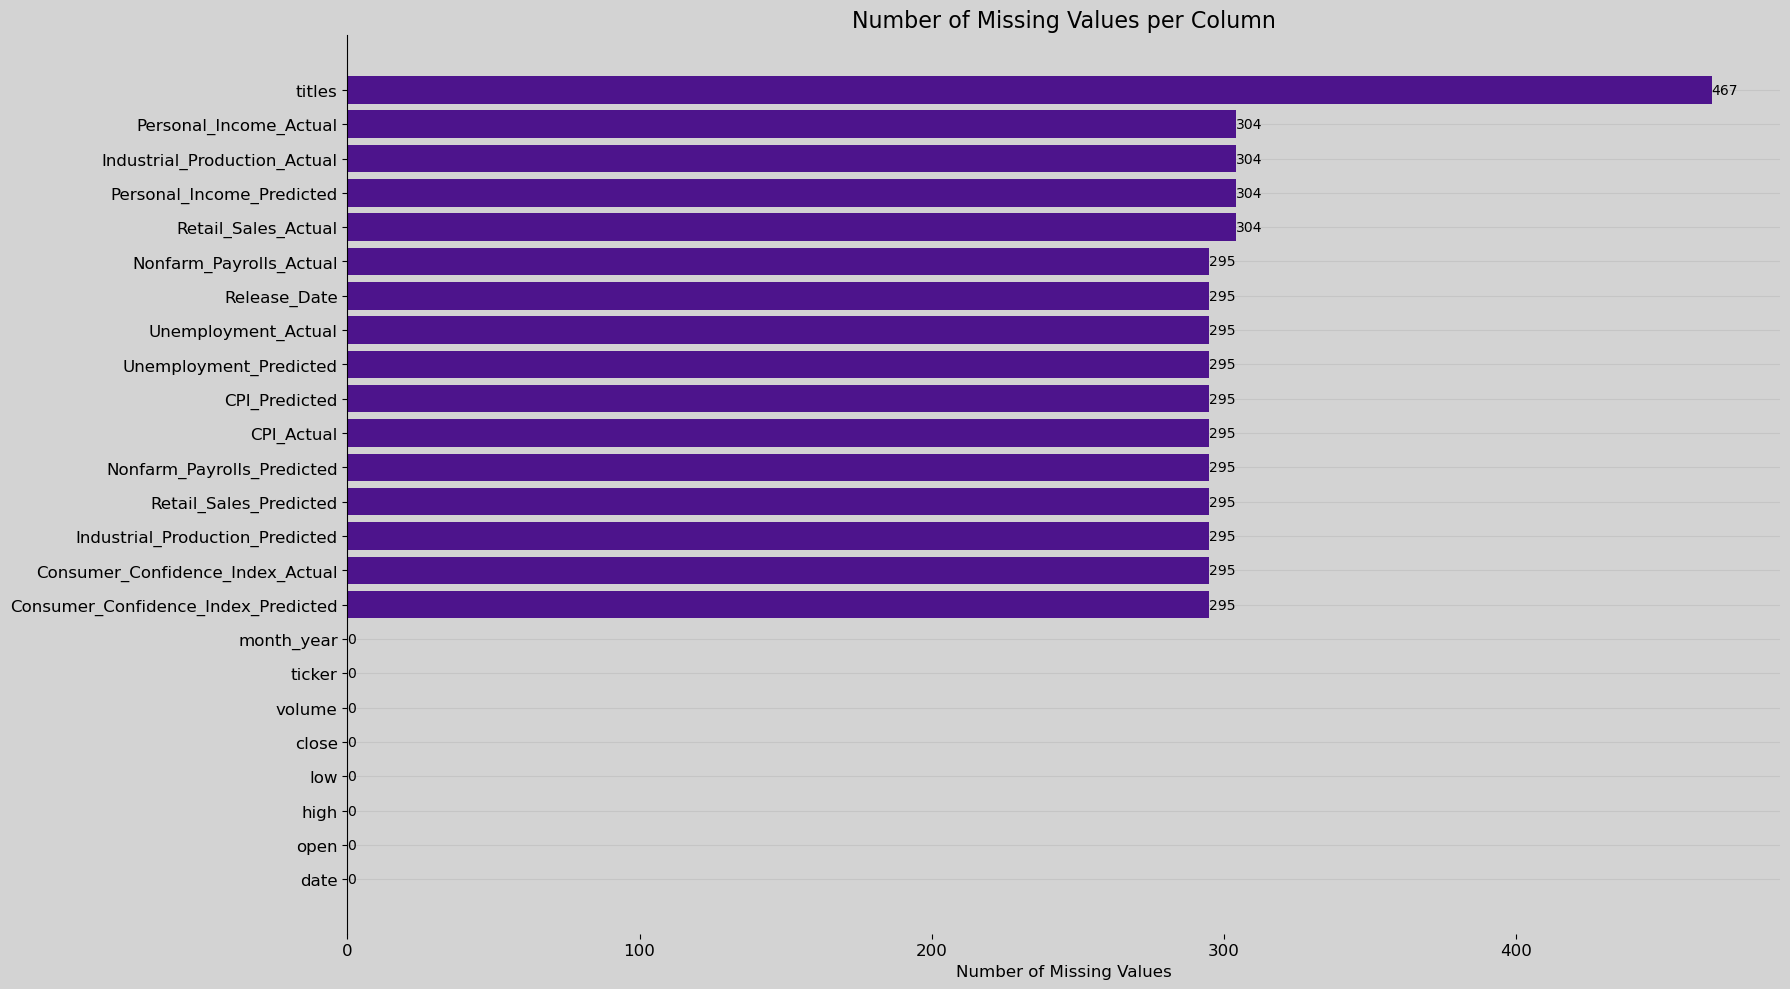

In [28]:
# Visualizing the missing 
def apply_chart_styling(ax, fig, title):
    fig.patch.set_facecolor('#D3D3D3')
    ax.set_facecolor('#D3D3D3')
    ax.grid(axis = 'y',linestyle = '-', alpha = 0.4)
    ax.set_axisbelow(True)
    for spine in ['top', 'right', 'bottom']:
        ax.spines[spine].set_visible(False)
    ax.tick_params(axis='both', which='major', labelsize=12)
    ax.set_title(title, fontsize=16)

missing_data = trump_term_data.isnull().sum().sort_values(ascending=True)
fig, ax = plt.subplots(1, 1, figsize=(18, 10))
bars = ax.barh(missing_data.index, missing_data.values, color='#4d148c')
ax.set_xlabel('Number of Missing Values', fontsize=12)
ax.bar_label(bars, fmt='%d')
apply_chart_styling(ax, fig, title='Number of Missing Values per Column')
plt.tight_layout()
plt.show()

# What did you know about the dataset?
The dataset consists of 2,333 records with 24 columns detailing various stock and economic attributes. Key features include:

- **Indentification Information**: date, ticker, Release_Date
- **Price Information**: open, high, low, close, volume
- **Macro Attributes**: Unemployment_Actual, Unemployment_Predicted, CPI_Actual, CPI_Predicted, Nonfarm_Payrolls_Actual, Nonfarm_Payrolls_Predicted, Retail_Sales_Actual, Retail_Sales_Predicted, Retail_Sales_Actual, Industrial_Production_Actual, Industrial_Production_Actual, Consumer_Confidence_Index_Actual, Consumer_Confidence_Index_Predicted, Personal_Income_Actual, Personal_Income_Predicted
- **News**: titles


# Understand The Variables

In [29]:
trump_term_data.columns

Index(['date', 'open', 'high', 'low', 'close', 'volume', 'ticker',
       'month_year', 'Release_Date', 'Unemployment_Actual',
       'Unemployment_Predicted', 'CPI_Actual', 'CPI_Predicted',
       'Nonfarm_Payrolls_Actual', 'Nonfarm_Payrolls_Predicted',
       'Retail_Sales_Actual', 'Retail_Sales_Predicted',
       'Industrial_Production_Actual', 'Industrial_Production_Predicted',
       'Consumer_Confidence_Index_Actual',
       'Consumer_Confidence_Index_Predicted', 'Personal_Income_Actual',
       'Personal_Income_Predicted', 'titles'],
      dtype='object')

In [30]:
trump_term_data.describe()

,open,high,low,close,volume,Unemployment_Actual,Unemployment_Predicted,CPI_Actual,CPI_Predicted,Nonfarm_Payrolls_Actual,Nonfarm_Payrolls_Predicted,Retail_Sales_Actual,Retail_Sales_Predicted,Industrial_Production_Actual,Industrial_Production_Predicted,Consumer_Confidence_Index_Actual,Consumer_Confidence_Index_Predicted,Personal_Income_Actual,Personal_Income_Predicted
count,2333.000000,2333.000000,2333.000000,2333.000000,2.333000e+03,2038.000000,2038.000000,2038.000000,2038.000000,2.038000e+03,2.038000e+03,2029.000000,2038.000000,2029.000000,2038.000000,2038.000000,2038.000000,2029.000000,2029.000000
mean,260.172354,262.118355,258.052537,260.222859,4.243368e+07,0.045931,0.047281,0.034199,0.033991,1.545280e+05,4.719823e+03,0.004000,0.003116,0.001858,0.002397,113.333857,112.643817,0.003807,0.001648
std,120.878172,121.761467,119.837716,120.848681,2.256851e+07,0.019081,0.024457,0.022034,0.021702,2.142159e+06,2.383626e+06,0.030524,0.019132,0.015390,0.014151,13.513406,12.996905,0.030519,0.029554
min,88.983065,90.588559,88.525691,89.907150,7.079300e+06,0.034000,0.034000,0.001000,0.002000,-2.053700e+07,-2.200000e+07,-0.164000,-0.120000,-0.112000,-0.115000,84.800000,87.900000,-0.131000,-0.141000
25%,156.803491,158.140068,155.161678,156.694000,2.588490e+07,0.037000,0.037000,0.019000,0.019000,1.570000e+05,1.750000e+05,-0.002000,0.001000,-0.001000,0.001000,102.600000,101.000000,0.002000,0.003000
50%,260.532228,263.603221,257.550411,260.298645,3.722870e+07,0.039000,0.039000,0.027000,0.027000,2.270000e+05,1.890000e+05,0.003000,0.003000,0.004000,0.003000,111.800000,111.800000,0.004000,0.003000
75%,352.325901,355.342019,350.181239,352.439117,5.366150e+07,0.044000,0.045000,0.042000,0.041000,3.130000e+05,2.500000e+05,0.007000,0.006000,0.007000,0.004000,125.600000,124.700000,0.005000,0.004000
max,538.926283,540.004732,535.661234,538.716675,1.986858e+08,0.147000,0.197000,0.091000,0.088000,4.800000e+06,3.000000e+06,0.177000,0.080000,0.054000,0.043000,138.400000,136.000000,0.211000,0.203000


# Variables Description
1. **Date**: The calendar date on which the data was recorded, typically in a format like YYYY-MM-DD.
2. **Close**: The final trading price of the stock at the end of the regular trading session on the given date.
3. **High**: The highest price at which the stock traded during the trading session on the given date.
4. **Low**: The lowest price at which the stock traded during the trading session on the given date.
5. **Open**: The price at which the stock began trading when the market opened on the given date.
6. **Volume**: The total number of shares of the stock traded during the trading session on the given date.
7. **month_year** : A derived field indicating the month and year of the data record, typically in a format like YYYY-MM or Month YYYY.
8. **Unemployment_Actual**: The actual unemployment rate reported for the relevant market or region on the release date, expressed as a percentage.
9. **Unemployment_Predicted**: The predicted unemployment rate for the relevant market or region, estimated prior to the release date, expressed as a percentage.
10. **CPI_Actual**: The actual Consumer Price Index value reported on the release date, measuring inflation in the relevant market or region.
11. **CPI_Predicted**: The predicted Consumer Price Index value for the relevant market or region, estimated prior to the release date.
12. **Nonfarm_Payrolls_Actual**: The actual number of jobs added or lost in the economy (excluding farm workers) reported on the release date, typically in thousands.
13. **Nonfarm_Payrolls_Predicted**: The predicted number of jobs added or lost in the economy (excluding farm workers), estimated prior to the release date, typically in thousands.
14. **Retail_Sales_Actual**: The actual total retail sales value reported on the release date, reflecting consumer spending in the relevant market or region, typically in monetary units.
15. **Retail_Sales_Predicted**: The predicted total retail sales value estimated prior to the release date, typically in monetary units.
16. **Industrial_Production_Actual**: The actual industrial production index value reported on the release date, measuring output in manufacturing, mining, and utilities.
17. **Industrial_Production_Predicted**: The predicted industrial production index value estimated prior to the release date.
18. **Consumer_Confidence Index_Actual**: The actual consumer confidence index value reported on the release date, reflecting consumer sentiment.
19. **Consumer_Confidence Index_Predicted**: The predicted consumer confidence index value estimated prior to the release date.
20. **Personal_Income_Actual**: The actual personal income value reported on the release date, representing total income received by individuals, typically in monetary units.
21. **Personal_Income_Predicted**: The predicted personal income value estimated prior to the release date, typically in monetary units.
22. **Article_title**: The title of a news article related to the stock or economic data for the given date.

# Check Unique Values for each variable.

In [31]:
for column in trump_term_data.columns:
    print(f"{column} : {len(trump_term_data[column].unique())}")

date : 2333
open : 2332
high : 2332
low : 2333
close : 2299
volume : 2332
ticker : 1
month_year : 112
Release_Date : 99
Unemployment_Actual : 34
Unemployment_Predicted : 33
CPI_Actual : 55
CPI_Predicted : 53
Nonfarm_Payrolls_Actual : 86
Nonfarm_Payrolls_Predicted : 64
Retail_Sales_Actual : 41
Retail_Sales_Predicted : 30
Industrial_Production_Actual : 32
Industrial_Production_Predicted : 21
Consumer_Confidence_Index_Actual : 90
Consumer_Confidence_Index_Predicted : 79
Personal_Income_Actual : 26
Personal_Income_Predicted : 20
titles : 1860


# **Part 2: Similarity Comparison**
This section analyzes the QQQ ETF’s behavior in Trump’s first term and second term across stock performance, macroeconomic indicators, and news sentiment to derive market insights.

# Load Library

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_rel
from wordcloud import WordCloud, STOPWORDS
import re
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
import matplotlib.font_manager as FM
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
import matplotlib.dates as mdates
import yfinance as yf

# Define colors
COLOR_2017 = '#0066FF'  # Blue for 2017
COLOR_2025 = '#FF6600'  # Orange for 2025
COLOR_HLINE = '#CCCCCC'  # Light gray for horizontal lines

# Use the correct Matplotlib style inspired by Seaborn
plt.style.use('seaborn-v0_8')  # Updated style name

# Set font parameters
plt.rcParams['font.size'] = 12
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['legend.fontsize'] = 10
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/kevinleungch421/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

# Overview
Historical Data: Obtain daily QQQ data (e.g., 'Close' prices) from January 1, 2017, to January 1, 2021, covering the four periods:

- 2017: Tax cuts & deregulation (centered around June 30, 2017).
- 2018: Trade tensions (centered around June 30, 2018).
- 2019: Bull market (centered around June 30, 2019).
- 2020: COVID-19 crash (centered around March 31, 2020).

[*********************100%***********************]  2 of 2 completed


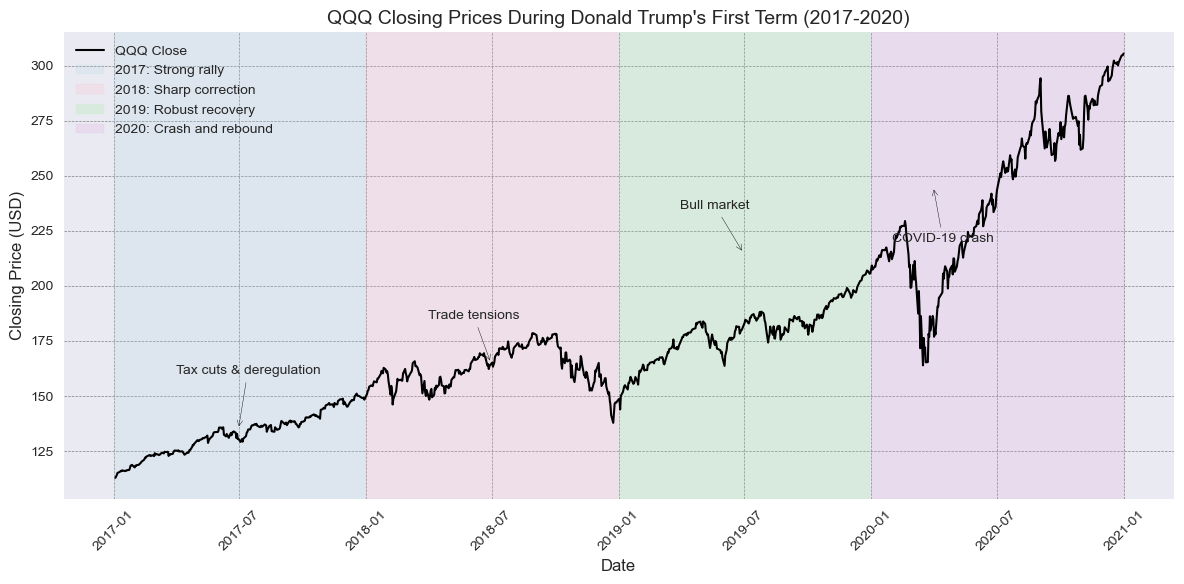

In [36]:
start = "2010-01-01"
end = "2025-02-20"
symbol = ['QQQ', 'AAPL']
df = yf.download(symbol, start=start, end=end)
df.to_csv("multi_assets.csv")
df.head()

# plot df
filtered_df = df[(df.index >= '2017-01-01') & (df.index <= '2020-12-31')]
sorted_filtered_df = filtered_df.sort_index()


# plot 
plt.figure(figsize=(12, 6))
plt.plot(sorted_filtered_df.index, sorted_filtered_df['Close']['QQQ'], 
         label='QQQ Close', color='black', linewidth=1.5)
colors = ['#ADD8E6', '#FFB6C1', '#90EE90', '#DDA0DD']  # Light blue, light pink, light green, light purple

# Highlight periods with subtle background spans
plt.axvspan(pd.to_datetime('2017-01-01'), pd.to_datetime('2017-12-31'), 
            color=colors[0], alpha=0.2, label='2017: Strong rally')
plt.axvspan(pd.to_datetime('2018-01-01'), pd.to_datetime('2018-12-31'), 
            color=colors[1], alpha=0.2, label='2018: Sharp correction')
plt.axvspan(pd.to_datetime('2019-01-01'), pd.to_datetime('2019-12-31'), 
            color=colors[2], alpha=0.2, label='2019: Robust recovery')
plt.axvspan(pd.to_datetime('2020-01-01'), pd.to_datetime('2020-12-31'), 
            color=colors[3], alpha=0.2, label='2020: Crash and rebound')

# Add annotations with slightly larger font for readability
plt.annotate('Tax cuts & deregulation', 
             xy=(pd.to_datetime('2017-06-30'), 135), xytext=(pd.to_datetime('2017-03-31'), 160),
             arrowprops=dict(facecolor='black', arrowstyle='->'), fontsize=10)
plt.annotate('Trade tensions', 
             xy=(pd.to_datetime('2018-06-30'), 165), xytext=(pd.to_datetime('2018-03-31'), 185),
             arrowprops=dict(facecolor='black', arrowstyle='->'), fontsize=10)
plt.annotate('Bull market', 
             xy=(pd.to_datetime('2019-06-30'), 215), xytext=(pd.to_datetime('2019-03-31'), 235),
             arrowprops=dict(facecolor='black', arrowstyle='->'), fontsize=10)
plt.annotate('COVID-19 crash', 
             xy=(pd.to_datetime('2020-03-31'), 245), xytext=(pd.to_datetime('2020-01-31'), 220),
             arrowprops=dict(facecolor='black', arrowstyle='->'), fontsize=10)

# Final plot adjustments
plt.title("QQQ Closing Prices During Donald Trump's First Term (2017-2020)", fontsize=14)
raw_data = pd.read_csv('/Users/kevinleungch421/Documents/GitHub/algotrade/Data_Analysis/qqq_full_df-Copy1.csv')
df = raw_data.copy()
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df.set_index('Date', inplace=True)
data_2017 = df.loc['2017-01'].copy()
data_2025 = df.loc['2025-01'].copy()
plt.xlabel('Date', fontsize=12)
plt.ylabel('Closing Price (USD)', fontsize=12)
plt.grid(True, color='gray', linestyle='--', linewidth=0.5)
plt.legend(loc='upper left')
plt.xticks(rotation=45)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

# **A. Trump First Months in Office Similarity ('Trump Put')**
-> This analysis **compares the stock market behavior, macro-economic data, and news** of the QQQ ETF during the first month of Donald Trump's presidency in January 2017 with a second term in January 2025. 

-> The goal is **to determine how similar** the price trends and daily fluctuations were between these two periods.

# Normalized Closing Prices: Jan 2017 vs Jan 2025

-> **Yes**, both shown a increase trend.

-> Suggested that investor are **excited** about Trump being in office

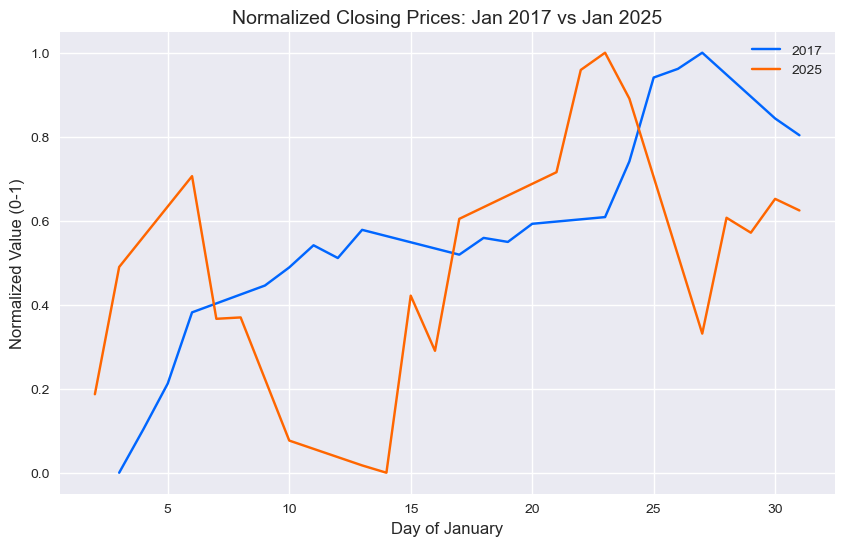

In [37]:
# Normalize closing prices (your existing function)
def normalize(series):
    return (series - series.min()) / (series.max() - series.min())
    
data_2017['Close_norm'] = normalize(data_2017['Close'])
data_2025['Close_norm'] = normalize(data_2025['Close'])

# Plot normalized closing prices
plt.figure(figsize=(10, 6))
plt.plot(data_2017.index.day, data_2017['Close_norm'], label='2017', color=COLOR_2017)
plt.plot(data_2025.index.day, data_2025['Close_norm'], label='2025', color=COLOR_2025)
plt.title('Normalized Closing Prices: Jan 2017 vs Jan 2025')
plt.xlabel('Day of January')
plt.ylabel('Normalized Value (0-1)')
plt.legend()
plt.grid(True)
plt.show()

# Daily Percentage Change: January 2017 vs January 2025

-> In 2017-01, the pct change was mostly above 1, showing regular small increases.
  
-> In 2025-01, it is evenly distributed above and below 1, indicating **volatile investment behavior**.

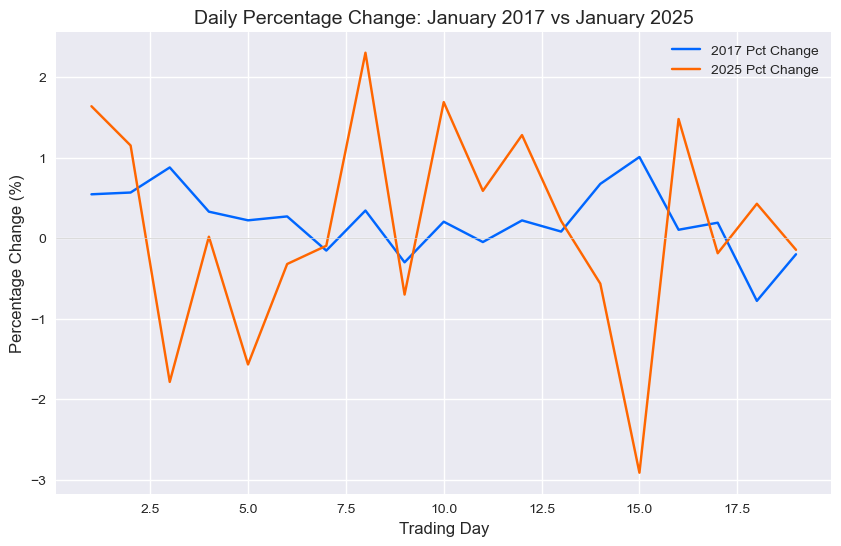

In [38]:
# Percentage changes (your existing calculation)
data_2017['Pct_Change'] = data_2017['Close'].pct_change() * 100
data_2025['Pct_Change'] = data_2025['Close'].pct_change() * 100

# Make sure same number of trading days
num_days = min(len(data_2017), len(data_2025))
data_2017 = data_2017.iloc[:num_days]
data_2025 = data_2025.iloc[:num_days]

# Plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_days), data_2017['Pct_Change'].iloc[1:], label='2017 Pct Change', color=COLOR_2017)
plt.plot(range(1, num_days), data_2025['Pct_Change'].iloc[1:], label='2025 Pct Change', color=COLOR_2025)
plt.axhline(0, color=COLOR_HLINE, linewidth=0.5)
plt.title('Daily Percentage Change: January 2017 vs January 2025')
plt.xlabel('Trading Day')
plt.ylabel('Percentage Change (%)')
plt.legend()
plt.grid(True)
plt.show()

# Distribution of Daily Percentage Changes

-> 2025-01 shows a wider distribution

-> and it have more extreme values

-> suggests that higher volatility compared to 2017-01

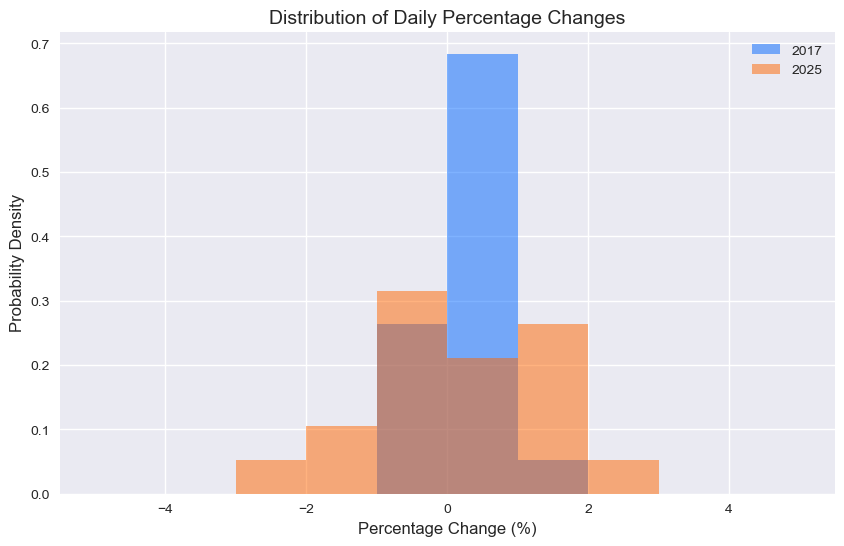

In [39]:
# Volatility analysis
bins = np.linspace(-5, 5, 11)
plt.figure(figsize=(10, 6))
plt.hist(data_2017['Pct_Change'].dropna(), bins=bins, alpha=0.5, label='2017', color=COLOR_2017, density=True)
plt.hist(data_2025['Pct_Change'].dropna(), bins=bins, alpha=0.5, label='2025', color=COLOR_2025, density=True)
plt.title('Distribution of Daily Percentage Changes')
plt.xlabel('Percentage Change (%)')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()

# Statistical similarity on Investment Behaviors

-> Despite volatility differences, a statistical test compared the average closing price trends in January 2017 and January 2025. 

-> Pair t-test a p-value of 0.6678 (>0.05), there’s no significant difference, confirming similar overall price trends in both periods.

-> In **finance**, the mean of **closing prices reflects the average trend**—whether it’s increasing or decreasing. 

In [40]:
# Statistical similarity (paired t-test)
df_merged = pd.merge(
    data_2017[['Close_norm']].reset_index().assign(day=data_2017.index.day),
    data_2025[['Close_norm']].reset_index().assign(day=data_2025.index.day),
    on='day', how='inner'
)
stat, p_value = ttest_rel(df_merged['Close_norm_x'], df_merged['Close_norm_y'])
print(f"Paired t-test p-value: {p_value:.4f}")
print("Trends are similar" if p_value > 0.05 else "Trends are different")

Paired t-test p-value: 0.6678
Trends are similar


-> coef: is 0.27, showing that 27% of the pattern in 2017-01 is mirrored in 2025-01

-> In stead of Trump excitement, There are other factor is difference on 2017-01, 2025-01

In [41]:
# Correlation
correlation = np.corrcoef(data_2017['Close_norm'].dropna(), data_2025['Close_norm'].dropna()[:len(data_2017)])[0, 1]
print(f"Correlation between normalized closes: {correlation:.4f}")

Correlation between normalized closes: 0.2733


# Word Clouds for News Titles

-> Both present of **'Trump'**

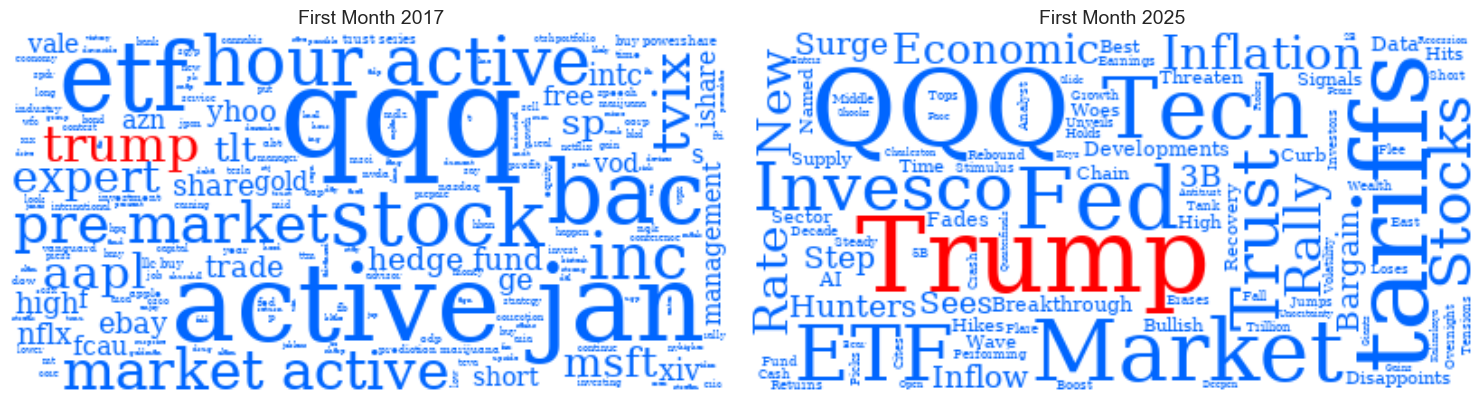

In [43]:
import matplotlib.font_manager as fm

# Define the font path (your existing line)
font_path = fm.findfont('serif')

# Updated function to generate word cloud
def generate_wordcloud(text, ax, font_path):
    words = re.findall(r'\w+', text.lower())
    
    def color_func(word, font_size, position, orientation, random_state=None, **kwargs):
        if word.lower() == 'trump':  # Case-insensitive check
            return 'red'
        else:
            return COLOR_2017  # '#0066FF'

    wordcloud = WordCloud(
        width=400,
        height=200,
        background_color='white',
        color_func=color_func,
        font_path=font_path,
        stopwords=STOPWORDS
    ).generate(text)
    
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.axis('off')

# Combine article titles (your existing lines)
text_2017 = ' '.join(data_2017['Article_title'].dropna().astype(str))
text_2025 = ' '.join(data_2025['Article_title'].dropna().astype(str))

# Create a figure for word clouds
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
generate_wordcloud(text_2017, axes[0], font_path)
axes[0].set_title('First Month 2017')
generate_wordcloud(text_2025, axes[1], font_path)
axes[1].set_title('First Month 2025')
plt.tight_layout()
plt.show()

# Sentiment Trends: January 2017 vs January 2025

-> the **patterns of sentiment evolution between the two periods**.

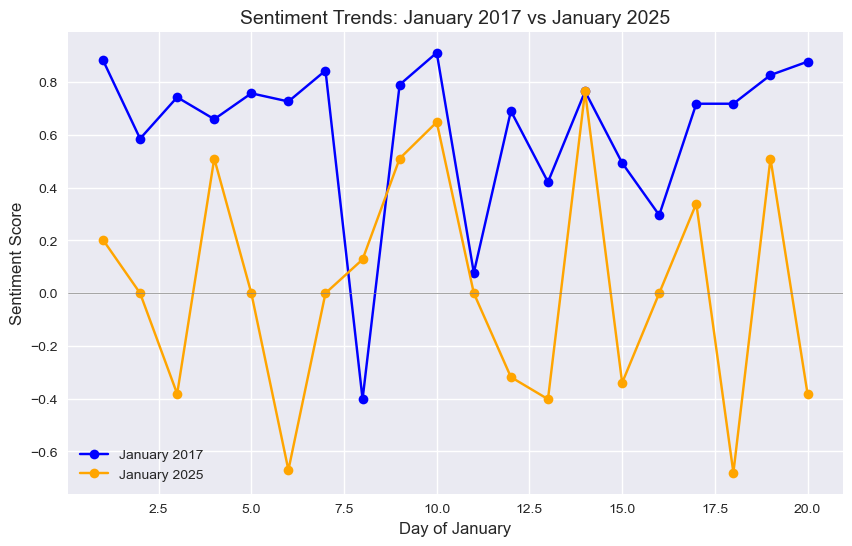

In [49]:
# Initialize the sentiment analyzer (your existing setup)
sid = SentimentIntensityAnalyzer()

# Define the sentiment function (your existing setup)
def get_sentiment(title):
    return sid.polarity_scores(title)['compound']

# Assuming data_2017 and data_2025 are DataFrames with 'Article_title' column
# Apply sentiment analysis (your existing code)
data_2017['Sentiment'] = data_2017['Article_title'].apply(get_sentiment)
data_2025['Sentiment'] = data_2025['Article_title'].apply(get_sentiment)

# Extract sentiment scores (your existing code)
sentiment_2017 = data_2017['Sentiment']
sentiment_2025 = data_2025['Sentiment']

# Plot sentiment trends (your existing code with assumed colors)
COLOR_2017 = 'blue'  # Replace with your actual color if defined
COLOR_2025 = 'orange'  # Replace with your actual color if defined
COLOR_HLINE = 'gray'  # Replace with your actual color if defined

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(sentiment_2017) + 1), sentiment_2017, label='January 2017', marker='o', color=COLOR_2017)
plt.plot(range(1, len(sentiment_2025) + 1), sentiment_2025, label='January 2025', marker='o', color=COLOR_2025)
plt.axhline(0, color=COLOR_HLINE, linewidth=0.5)
plt.title('Sentiment Trends: January 2017 vs January 2025')
plt.xlabel('Day of January')
plt.ylabel('Sentiment Score')
plt.legend()
plt.grid(True)
plt.show()

# Statistical similarity on News sentiment

-> The proportion of 0.5789 indicates that sentiment changes in news articles aligned on approximately **57.89%** of the days.

-> suggesting a moderate similarity in sentiment trends between January 2017 and January 2025.

In [51]:
# Calculate daily sentiment changes
data_2017['Sentiment_Change'] = data_2017['Sentiment'].diff()
data_2025['Sentiment_Change'] = data_2025['Sentiment'].diff()

# Determine the sign of sentiment changes and reset index
sign_2017 = np.sign(data_2017['Sentiment_Change'].dropna()).reset_index(drop=True)
sign_2025 = np.sign(data_2025['Sentiment_Change'].dropna()).reset_index(drop=True)

# Ensure both Series have the same length
min_length = min(len(sign_2017), len(sign_2025))
sign_2017 = sign_2017[:min_length]
sign_2025 = sign_2025[:min_length]

# Calculate the proportion of matching signs
matching_signs = (sign_2017 == sign_2025).mean()
print(f"Proportion of matching sentiment change directions: {matching_signs:.4f}")

Proportion of matching sentiment change directions: 0.5789


# Macroeconomic Indicators Bar Plots

-> Mostly similar, or better off

-> Only difference is the Inflation is higher, and Retail Sales decrease

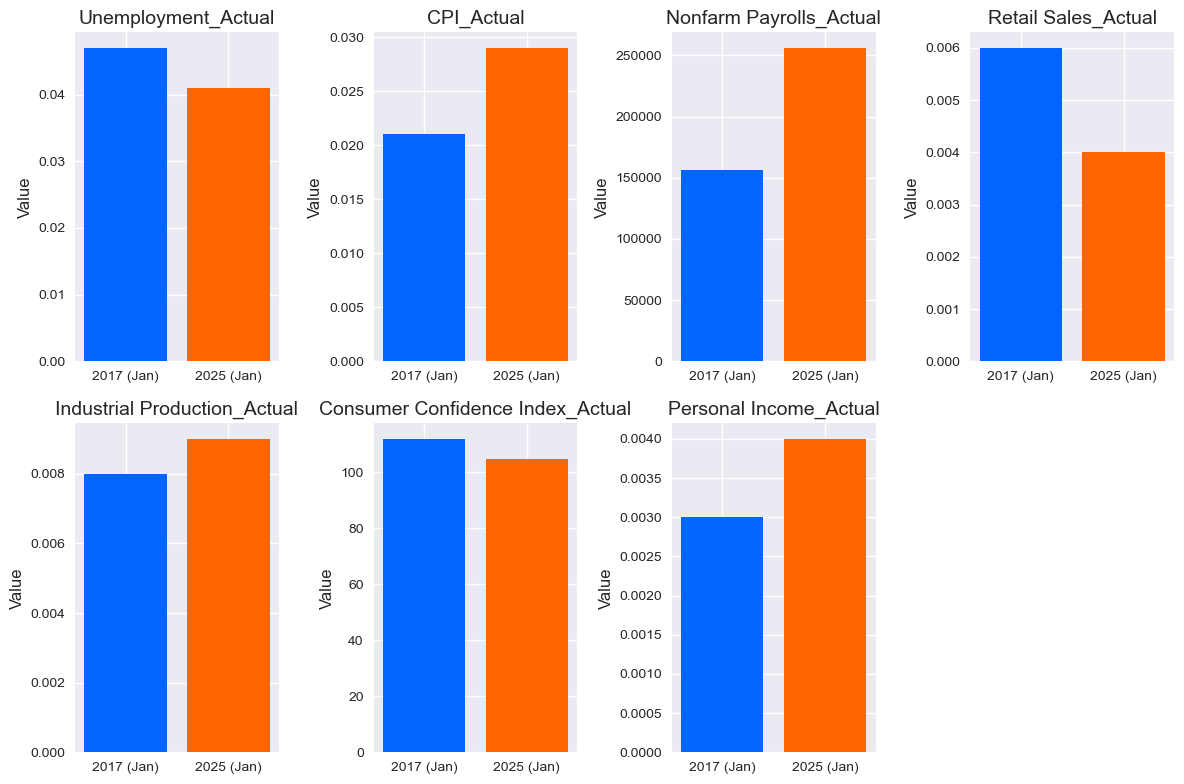

In [150]:
# Macroeconomic data extraction (your existing function)
def extract_monthly_macro_data(df, indicators):
    monthly_data = df.groupby(df.index.to_period('M'))[indicators].mean()
    return monthly_data

macro_indicators = [
    'Unemployment_Actual', 'CPI_Actual', 'Nonfarm Payrolls_Actual', 'Retail Sales_Actual',
    'Industrial Production_Actual', 'Consumer Confidence Index_Actual', 'Personal Income_Actual'
]

monthly_2017 = extract_monthly_macro_data(data_2017, macro_indicators)
monthly_2025 = extract_monthly_macro_data(data_2025, macro_indicators)

# Set up the grid
n_indicators = len(macro_indicators)
n_cols = 4
n_rows = (n_indicators + n_cols - 1) // n_cols
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(12, 4 * n_rows))
axes = axes.flatten()

# Plot each indicator
for i, indicator in enumerate(macro_indicators):
    value_2017 = monthly_2017[indicator].values[0]
    value_2025 = monthly_2025[indicator].values[0]
    axes[i].bar(['2017 (Jan)', '2025 (Jan)'], [value_2017, value_2025], color=[COLOR_2017, COLOR_2025])
    axes[i].set_title(f'{indicator}')
    axes[i].set_ylabel('Value')
    axes[i].grid(True)

# Hide unused axes
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

# What did you know about the **Trump Put**?

- **Price Information**: Despite the violocity is more flucturate on 2025, Both of them show a increase trend, and the pair t-test with p-value of 0.6678, show that there is no significant difference between two trend.

- **News**: Keywords of trump and Pattern on sentiment shown similarity.
  
- **Macro Attributes**: Mostly similar, or better off. Only difference is the Inflation is higher, and Retail Sales decrease
News: titles

-> Trump’s first month of presidency **excited the market**.

# **B. Trump Impose Tariff Policies Similarity ('Trade War')**

-> **July 2018**: The U.S., under President Trump, initiated a trade war by imposing tariffs on $34 billion worth of Chinese goods

-> including cars and aircraft parts. China retaliated with tariffs on U.S. products like soybeans and automobiles, escalating tensions.

-> **January 2025**: Trump expressed views on using tariffs to "protect America," 

-> suggesting a continuation or escalation of trade policies, likely targeting China again, consistent with his earlier approach.

In [54]:
tradewar_2018 = df.loc['2018-09':'2018-11'].copy()
tradewar_2025 = df.loc['2025-02':'2025-04'].copy()

# Normalized Closing Prices: Sep-Nov 2017 vs Feb-Apr 2025

-> Yes, both shown a decrease trend.

-> Suggested that investor are excited about Trump being in office

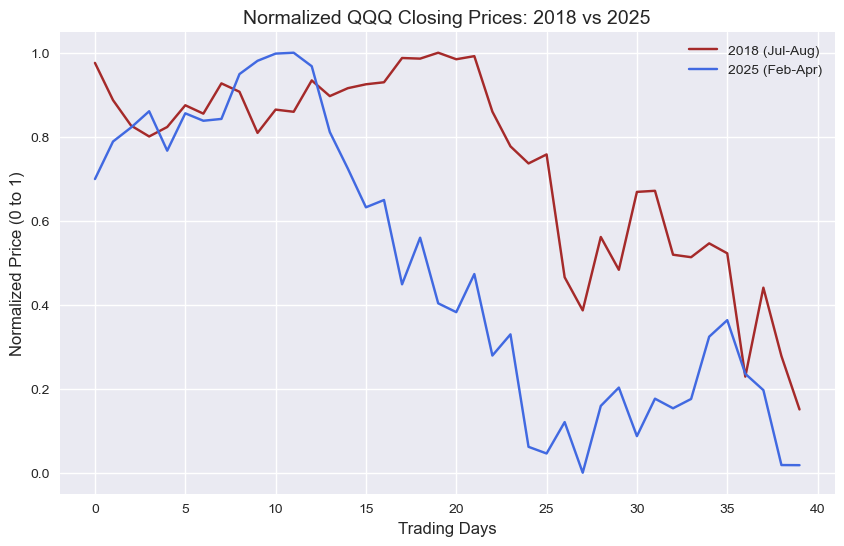

In [55]:
# Normalize closing prices and calculate percentage changes
tradewar_2018['Close_norm'] = normalize(tradewar_2018['Close'])
tradewar_2025['Close_norm'] = normalize(tradewar_2025['Close'])

# Add trading day index
tradewar_2018['Trading_Day'] = range(len(tradewar_2018))
tradewar_2025['Trading_Day'] = range(len(tradewar_2025))

# Trim to the same number of trading days
num_days = min(len(tradewar_2018), len(tradewar_2025))
tradewar_2018_trimmed = tradewar_2018.iloc[:num_days]
tradewar_2025_trimmed = tradewar_2025.iloc[:num_days]

COLOR_2018 = '#A52A2A'
COLOR_2025 = '#4169E1'
COLOR_HLINE = '#7f7f7f'  # Medium gray for horizontal lines
plt.figure(figsize=(10, 6))
plt.plot(tradewar_2018_trimmed['Trading_Day'], tradewar_2018_trimmed['Close_norm'], label='2018 (Jul-Aug)', color=COLOR_2018)
plt.plot(tradewar_2025_trimmed['Trading_Day'], tradewar_2025_trimmed['Close_norm'], label='2025 (Feb-Apr)', color=COLOR_2025)
plt.title('Normalized QQQ Closing Prices: 2018 vs 2025')
plt.xlabel('Trading Days')
plt.ylabel('Normalized Price (0 to 1)')
plt.legend()
plt.grid(True)
plt.show()

# Daily Percentage Change: Sep-Nov 2017 vs Feb-Apr 2025

-> pattern look similar.

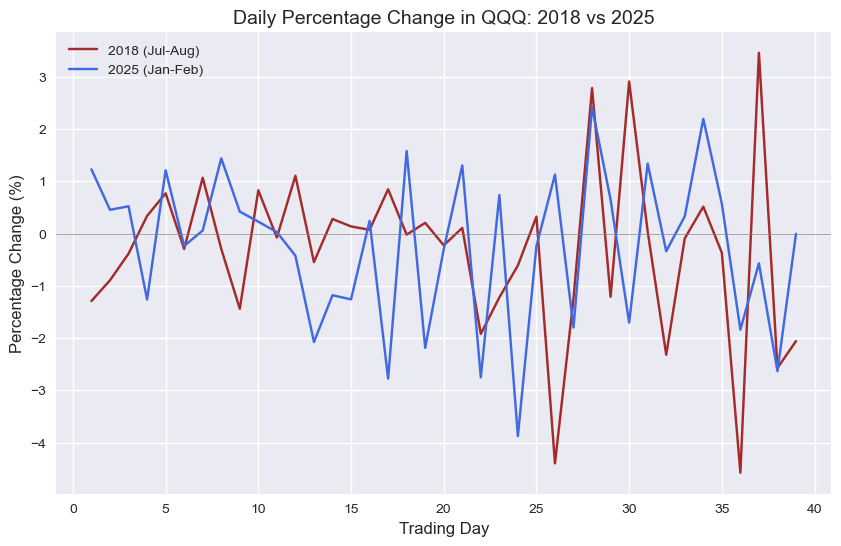

In [56]:
tradewar_2018['Pct_Change'] = tradewar_2018['Close'].pct_change() * 100
tradewar_2025['Pct_Change'] = tradewar_2025['Close'].pct_change() * 100

# Trim to the same number of trading days
num_days = min(len(tradewar_2018), len(tradewar_2025))
tradewar_2018_trimmed = tradewar_2018.iloc[:num_days]
tradewar_2025_trimmed = tradewar_2025.iloc[:num_days]

plt.figure(figsize=(10, 6))
plt.plot(range(1, num_days), tradewar_2018_trimmed['Pct_Change'].iloc[1:], label='2018 (Jul-Aug)', color=COLOR_2018)
plt.plot(range(1, num_days), tradewar_2025_trimmed['Pct_Change'].iloc[1:], label='2025 (Jan-Feb)', color=COLOR_2025)
plt.axhline(0, color=COLOR_HLINE, linewidth=0.5)
plt.title('Daily Percentage Change in QQQ: 2018 vs 2025')
plt.xlabel('Trading Day')
plt.ylabel('Percentage Change (%)')
plt.legend()
plt.grid(True)
plt.show()

# Distribution of Daily Percentage Changes

-> shows a similar distribution

-> it also have more bounce back, while 2018 is keep dropping.

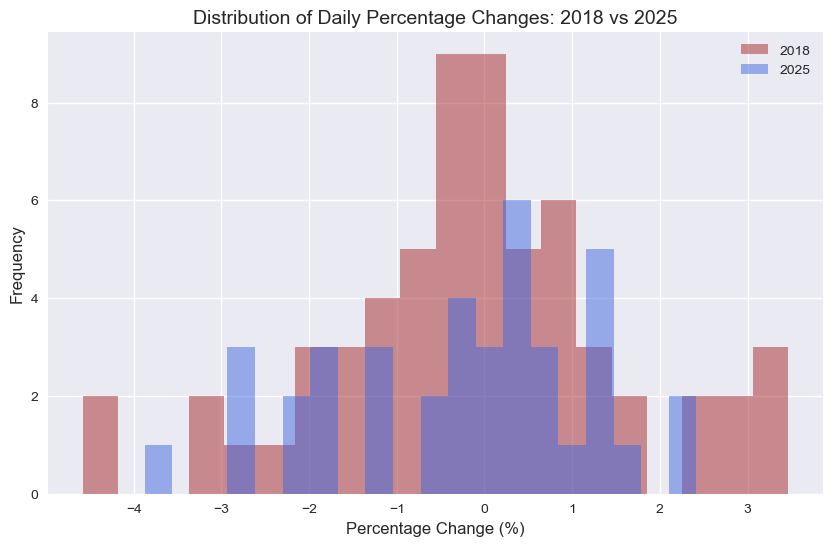

In [57]:
plt.figure(figsize=(10, 6))
plt.hist(tradewar_2018['Pct_Change'].dropna(), bins=20, alpha=0.5, label='2018', color=COLOR_2018)
plt.hist(tradewar_2025['Pct_Change'].dropna(), bins=20, alpha=0.5, label='2025', color=COLOR_2025)
plt.title('Distribution of Daily Percentage Changes: 2018 vs 2025')
plt.xlabel('Percentage Change (%)')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

# Statistical similarity on Investment Behaviors

-> Pair t-test a p-value of 0.6678 (>0.05)

-> there’s no significant difference

-> confirming similar overall price trends in both periods.

-> In finance, the mean of closing prices reflects the average trend—whether it’s increasing or decreasing.

In [58]:
t_stat, p_value = ttest_ind(tradewar_2018['Close_norm'].dropna(), tradewar_2025['Close_norm'].dropna(), equal_var=False)
print(f"Unpaired t-test statistic: {t_stat:.4f}, p-value: {p_value:.4f}")
if p_value > 0.05:
    print("The trends are similar (no significant difference).")
else:
    print("The trends are different (significant difference).")

Unpaired t-test statistic: 1.4117, p-value: 0.1621
The trends are similar (no significant difference).


-> coef: is 0.68

-> showing that 68% of the pattern in 2018 is mirrored in 2025

-> In stead of Trump excitement

-> There are other factor is difference on 2018, 2025

In [59]:
# Your cleaning steps
data_2018_clean = tradewar_2018_trimmed['Close_norm'].dropna()
data_2025_clean = tradewar_2025_trimmed['Close_norm'].dropna()
min_length = min(len(data_2018_clean), len(data_2025_clean))
data_2018_clean = data_2018_clean[:min_length]
data_2025_clean = data_2025_clean[:min_length]

# Convert to NumPy arrays to avoid index issues
array_2018 = data_2018_clean.values  # Fixed: data_2017_clean -> data_2018_clean
array_2025 = data_2025_clean.values

# Calculate correlation using NumPy (bypasses pandas alignment)
correlation = np.corrcoef(array_2018, array_2025)[0, 1]
if np.isnan(correlation):
    print("Correlation is NaN. Check data integrity.")
else:
    print(f'Correlation between normalized closes: {correlation:.4f}')

Correlation between normalized closes: 0.6850


# Word Clouds for News Titles

-> **2018**: "China" and "trade war" likely dominate

-> reflecting the U.S.-China tariff conflict.

-> **2025**: "Tariff" stands out, aligning with Trump’s protective stance

-> with "China" possibly recurring if tensions persist.

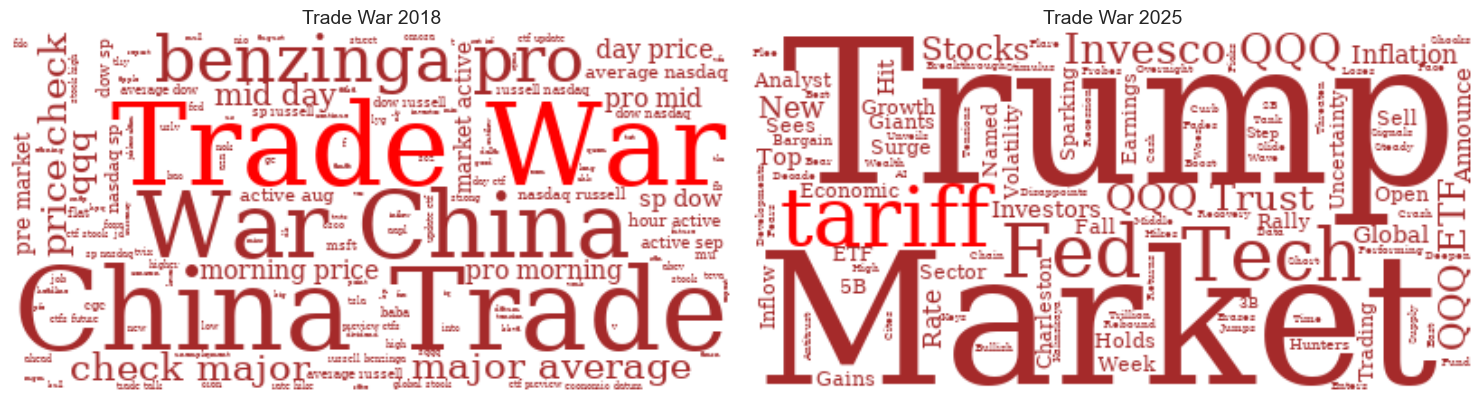

In [60]:
font_path = fm.findfont('serif')
tradewar_2018, tradewar_2025 = [df.loc[start:end].copy() for start, end in [('2018-08', '2018-09'), ('2025-01', '2025-02')]]
text_2018 = ' '.join(tradewar_2018['Article_title'].dropna().astype(str))
text_2025 = ' '.join(tradewar_2025['Article_title'].dropna().astype(str))

# Your generate_wordcloud function (already defined)
def generate_wordcloud(text, ax, font_path):
    words = re.findall(r'\w+', text.lower())
    
    def color_func(word, font_size, position, orientation, random_state=None, **kwargs):
        if word in ['tariff', 'trade', 'war']:
            return 'red'
        if word == 'Trade War':
            return 'red'
        else:
            return '#A52A2A'  # Replace COLOR_2018 with a valid color, e.g., 'green'

    wordcloud = WordCloud(
        width=400,
        height=200,
        background_color='white',
        color_func=color_func,
        font_path=font_path,
        stopwords=STOPWORDS
    ).generate(text)
    
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.axis('off')

# Create figure and generate word clouds
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
generate_wordcloud(text_2018, axes[0], font_path)
axes[0].set_title('Trade War 2018')
generate_wordcloud(text_2025, axes[1], font_path)
axes[1].set_title('Trade War 2025')
plt.tight_layout()
plt.show()

# Sentiment Trends: Sep-Nov 2017 vs Feb-Apr 2025

-> similar pattern

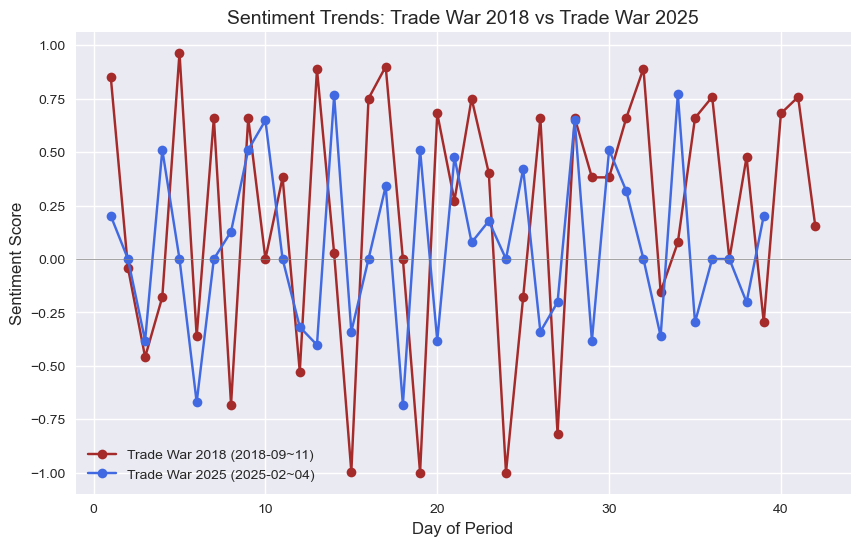

In [62]:
# Initialize VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Function to compute compound sentiment score
def get_sentiment(title):
    return sid.polarity_scores(title)['compound']

# Calculate sentiment scores for each title
tradewar_2018['Sentiment'] = tradewar_2018['Article_title'].apply(get_sentiment)
tradewar_2025['Sentiment'] = tradewar_2025['Article_title'].apply(get_sentiment)

# Extract sentiment series
sentiment_2018 = tradewar_2018['Sentiment']
sentiment_2025 = tradewar_2025['Sentiment']

# Compute daily differences (day-to-day changes)
diff_2018 = sentiment_2018.diff().dropna()
diff_2025 = sentiment_2025.diff().dropna()

# Ensure both series have the same length
min_length = min(len(diff_2018), len(diff_2025))
diff_2018 = diff_2018[:min_length]
diff_2025 = diff_2025[:min_length]

# Determine the signs of the differences (+1, -1, or 0)
diff_2018 = np.sign(diff_2018.values)
sign_2025 = np.sign(diff_2025.values)

# Define colors
COLOR_2018 = '#A52A2A'  # Brownish red for 2018
COLOR_2025 = '#4169E1'  # Royal blue for 2025
COLOR_HLINE = '#7F7F7F'  # Medium gray for horizontal lines

# Plot sentiment trends with updated colors
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(sentiment_2018) + 1), sentiment_2018, label='Trade War 2018 (2018-09~11)', marker='o', color=COLOR_2018)
plt.plot(range(1, len(sentiment_2025) + 1), sentiment_2025, label='Trade War 2025 (2025-02~04)', marker='o', color=COLOR_2025)
plt.axhline(0, color=COLOR_HLINE, linewidth=0.5)
plt.title('Sentiment Trends: Trade War 2018 vs Trade War 2025')
plt.xlabel('Day of Period')
plt.ylabel('Sentiment Score')
plt.legend()
plt.grid(True)
plt.show()

# Statistical similarity on News sentiment

In [63]:
# Calculate the proportion of matching signs
matching_signs = (diff_2018 == sign_2025).mean()
print(f"Proportion of matching sentiment change directions: {matching_signs:.4f}")

Proportion of matching sentiment change directions: 0.4737


# Macroeconomic Indicators Bar Plots

-> Unemployment, CPI, and Nonfarm Payrolls may show similarity

-> suggesting a steady labor market and inflation despite trade tensions.

-> Industrial Production and Personal Income might improve (stronger activity and earnings)

-> while **Retail Sales and Consumer Confidence** could weaken (lower spending and sentiment), reflecting mixed economic impacts.

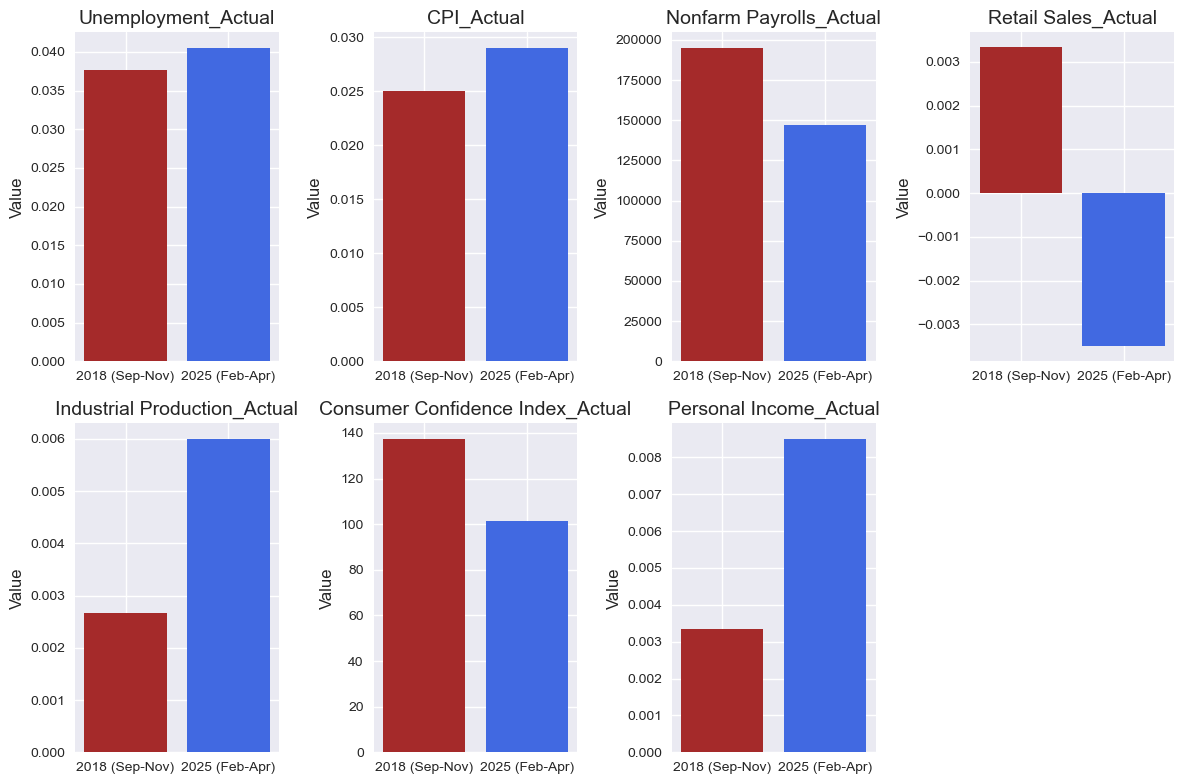

In [66]:
# Macroeconomic indicators
tradewar_2018, tradewar_2025 = [df.loc[start:end].copy() for start, end in [('2018-09', '2018-11'), ('2025-02', '2025-04')]]
macro_indicators = ['Unemployment_Actual', 'CPI_Actual', 'Nonfarm Payrolls_Actual',
                    'Retail Sales_Actual', 'Industrial Production_Actual',
                    'Consumer Confidence Index_Actual', 'Personal Income_Actual']

# Extract monthly averages
def extract_monthly_macro_data(df, indicators):
    return df.groupby(df.index.to_period('M'))[indicators].mean()

monthly_2018 = extract_monthly_macro_data(tradewar_2018, macro_indicators)
monthly_2025 = extract_monthly_macro_data(tradewar_2025, macro_indicators)

# Set up the grid
n_indicators = len(macro_indicators)
n_cols = 4
n_rows = (n_indicators + n_cols - 1) // n_cols
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(12, 4 * n_rows))
axes = axes.flatten()

for i, indicator in enumerate(macro_indicators):
    data_2018 = monthly_2018[indicator].mean()
    data_2025 = monthly_2025[indicator].mean()
    axes[i].bar(['2018 (Sep-Nov)', '2025 (Feb-Apr)'], [data_2018, data_2025], color=[COLOR_2018, COLOR_2025])
    axes[i].set_title(indicator)
    axes[i].set_ylabel('Value')
    axes[i].grid(True)

for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

# What did you know about the Trade War?
- **Price Information**: Both of them show a decrease trend, and the pair t-test with p-value of 0.1621, show that there is no significant difference between two trend.

- **News**: Keywords of "China" and "trade war", "Tariff" stand out, reflecting the U.S.-China tariff conflict. and Pattern on sentiment shown similarity.

- **Macro Attributes**: Unemployment, CPI, and Nonfarm Payrolls may show similarity, suggesting a steady labor market and inflation despite trade tensions. BUT, Industrial Production and Personal Income might improve (stronger activity and earnings), while **Retail Sales and Consumer Confidence** could weaken (lower spending and sentiment), reflecting mixed economic impacts.

-> Trump’s approach to trade wars and tariffs in 2018 and 2025 exhibits similarities in market behavior, economic stability, and a focus on China.

# **Part 3: Backtest on Strategy**

DCA, a strategy where investors allocate fixed amounts at regular intervals, is a good strategy to mitigate risks in volatile markets. If Trump’s first and second terms change the market in similar ways, could DCA help people invest safely? This writing will explore if DCA is a good idea during these times.

# Idea

To test whether Dollar Cost Averaging (DCA) is a good investment strategy compared to other strategies during the four annotated periods in your QQQ chart—Tax cuts & deregulation (2017), Trade tensions (2018), Bull market (2019), and COVID-19 crash (2020)

the test is design an experiment that simulates and compares DCA against various technical trading strategies.

# Load Library

In [169]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import yfinance as yf
start = "2010-01-01"
end = "2025-02-20"
symbol = ['QQQ', 'AAPL']
df = yf.download(symbol, start=start, end=end)
df.to_csv("multi_assets.csv")

[*********************100%***********************]  2 of 2 completed


# Simulation Function For **Iterative Backtesting**
Initial Capital and Deposits: Start with a zero balance and add a fixed monthly deposit (e.g., $1,000) on the first trading day of each month for all strategies.

In [170]:
# ------------------------------------------------------------------------------
# Trading Simulation using OOP and Pandas
#
# This simulation reads historical market data, applies monthly deposits,
# computes various technical indicators, and then simulates trading.
#
# Strategies implemented:
#   • DCA (Dollar-Cost Averaging)
#   • SMA Crossover
#   • EMA Crossover
#   • MACD
#   • RSI
#   • Bollinger Bands Breakout
#   • Momentum
#   • Rate of Change (ROC)
#   • Donchian Channel Breakout
#   • Mean Reversion
#
# Modifications:
#   • Added performance metrics calculation in close_pos() using self.nav_history
#   • Metrics include Sharpe Ratio, CAGR, Win %, Avg. %, Avg. Win %, Avg. Loss %,
#     Profit Factor, Max DD %, DD Duration, and Recovery Factor
# ------------------------------------------------------------------------------

class IterativeBase:
    def __init__(self, symbol, start, end, amount, use_spread=True):
        self.symbol = symbol
        self.start = start
        self.end = end
        self.monthly_deposite = amount  # Monthly deposit amount
        self.initial_broker_balance = 0.0
        self.current_broker_balance = 0.0  # Cash balance updated during simulation
        self.units = 0.0                 # Number of shares held (can be negative when short)
        self.trades = 0                  # Counter for executed trades
        self.position = 0                # 0 = neutral, 1 = long, -1 = short
        self.use_spread = use_spread
        self.get_data()
    
    def get_data(self):
        # Read market data from CSV with a multi-level header.
        raw = pd.read_csv("multi_assets.csv", header=[0, 1],
                          index_col=0, parse_dates=[0]).dropna()
        # Swap header levels so that "Close" is one column; sort columns by name.
        raw = raw.swaplevel(axis="columns").sort_index(axis="columns")
        df_symbol = raw[self.symbol].copy()
        df_symbol.rename(columns={"Close": "price"}, inplace=True)
        data = df_symbol[["price"]].copy()
        data = data.loc[self.start:self.end]
        data["spread"] = 0.0001
        data["returns"] = np.log(data["price"] / data["price"].shift(1))

        # Build event dates: first available trading day of each month.
        event_dates = []
        freq = "MS"  # Month start frequency.
        for dt in pd.date_range(start=self.start, end=self.end, freq=freq):
            idx = data.index.searchsorted(dt)
            if idx < len(data.index):
                event_dates.append(data.index[idx])
        event_dates = pd.DatetimeIndex(event_dates)
        
        # Create a deposit column (deposits occur on event dates)
        data["deposit"] = 0.0
        data.loc[event_dates, "deposit"] = self.monthly_deposite
        
        # Cumulative invested money (i.e. savings in a bank)
        data["invest_money"] = data["deposit"].cumsum()
        self.data = data

    def plot_data(self, cols=None):
        if cols is None:
            cols = "price"
        self.data[cols].plot(figsize=(12, 8), title=self.symbol)
        plt.show()

    def get_values(self, bar):
        date = self.data.index[bar]
        price = round(self.data["price"].iloc[bar], 5)
        spread = round(self.data["spread"].iloc[bar], 5)
        deposit = self.data["deposit"].iloc[bar]
        invest_money = self.data["invest_money"].iloc[bar]
        return date, price, spread, deposit, invest_money

    def apply_monthly_deposit(self, bar):
        date, price, spread, deposit, invest_money = self.get_values(bar)
        if deposit > 0:
            self.current_broker_balance += deposit
            print(f"{date.date()} | Deposit: +{deposit} | New Balance: {round(self.current_broker_balance, 2)}")

    def buy_instrument(self, bar, units=None, amount=None):
        date, price, spread, deposit, invest_money = self.get_values(bar)
        if self.use_spread:
            price += spread / 2
        if amount is not None:
            if isinstance(amount, str) and amount.lower() == "all":
                amount = self.current_broker_balance
            units = math.floor(amount / price)
        else:
            units = int(units)
        self.current_broker_balance -= units * price
        self.units += units
        self.trades += 1
        print(f"{date.date()} | Buying {units} share(s) at {round(price,5)} | New Balance: {round(self.current_broker_balance, 2)}")

    def sell_instrument(self, bar, units=None, amount=None):
        date, price, spread, deposit, invest_money = self.get_values(bar)
        if self.use_spread:
            price -= spread / 2
        if amount is not None:
            if isinstance(amount, str) and amount.lower() == "all":
                amount = self.current_broker_balance
            units = math.floor(amount / price)
        else:
            units = int(units)
        self.current_broker_balance += units * price
        self.units -= units
        self.trades += 1
        print(f"{date.date()} | Selling {units} share(s) at {round(price,5)} | New Balance: {round(self.current_broker_balance, 2)}")


    def print_current_balance(self, bar):
        date, _, _, _, _ = self.get_values(bar)
        print(f"{date.date()} | Current Balance: {round(self.current_broker_balance, 2)}")

    def print_if_save_on_bank(self, bar):
        date, _, _, _, invest_money = self.get_values(bar)
        return self.data.loc[date, "invest_money"]

    def close_pos(self, bar, plot_nav=True):
        date, price, spread, deposit, invest_money = self.get_values(bar)
        print("-" * 75)
        print(f"{date.date()} | +++ CLOSING FINAL POSITION +++")
        self.current_broker_balance += self.units * price
        print(f"{date.date()} | Closing position of {self.units} share(s) at {round(price,5)}")
        self.units = 0.0
        self.trades += 1
        base = self.print_if_save_on_bank(bar)
        perf = (self.current_broker_balance - base) / base * 100
        self.print_current_balance(bar)
        print(f"{date.date()} | Net performance vs. bank savings (%) = {round(perf, 2)}")
        print(f"{date.date()} | Total trades executed = {self.trades}")
        print("-" * 75)

        # Compute bank savings history.
        bank_history = [self.data.loc[dt, "invest_money"] for dt in self.nav_dates]
        if plot_nav:
            plt.figure(figsize=(12, 6))
            if hasattr(self, "plot_title"):
                plot_title = self.plot_title.strip() + " Performance vs. Bank Savings"
            else:
                plot_title = "Portfolio Performance vs. Bank Savings"
            plt.plot(self.nav_dates, self.nav_history, label="Portfolio NAV", marker='o')
            plt.plot(self.nav_dates, bank_history, label="Bank Savings", linestyle='--')
            plt.xlabel("Date")
            plt.ylabel("Value")
            plt.title(plot_title)
            plt.legend()
            plt.grid(True)
            plt.show()
        # Return a dictionary containing results.
        return {
            "nav_dates": self.nav_dates,
            "nav_history": self.nav_history,
            "bank_history": bank_history,
            "plot_title": self.plot_title
        }

# Define Strategy

- **Dollar Cost Averaging (DCA)**: Invest a fixed amount (e.g., $1,000) at regular intervals, such as the last trading day of each month, regardless of price. Shares are accumulated over time, reducing the impact of volatility.

- **SMA Crossove**r: Buy when a short Simple Moving Average (e.g., 50-day) crosses above a long SMA (e.g., 200-day).
Sell or short when it crosses below.

- **EMA Crossover**: Buy when the MACD line (12, 26, 9 parameters) crosses above the signal line.

- **MACD**: Buy when the MACD line (12, 26, 9 parameters) crosses above the signal line.

- **Bollinger Bands Breakout**: Buy when the price breaks above the upper band (e.g., 20-day SMA ± 2 standard deviations).

- **Momentum**: Buy when the price is above its n-day average (e.g., 10-day).

- **Rate of Change (ROC)**: Buy when ROC (e.g., 10-day) is positive.

- **Donchian Channel Breakout**: Buy when the price exceeds the n-day high (e.g., 20-day).

- **Mean Reversion**: Buy when the price is significantly below its n-day mean (e.g., 20-day SMA minus 1 standard deviation).

In [171]:
# ------------------------------------------------------------------------------
# Extended Backtest with Multiple Strategies
#
# This subclass adds helper methods to go long and short and then defines
# strategy-specific simulation methods. Each strategy method resets the simulation,
# computes its indicators, applies monthly deposits on every bar, records the NAV
# history, and finally returns the results (without plotting if plot_nav=False).
# ------------------------------------------------------------------------------
class IterativeBacktest(IterativeBase):
    def go_long(self, bar, units=None, amount=None, accumulate=False):
        if self.position == -1 and self.units < 0:
            self.buy_instrument(bar, units=-self.units)
            self.position = 0  
        if not accumulate and self.position == 1:
            return
        if units is not None:
            self.buy_instrument(bar, units=units)
        elif amount is not None:
            if amount == "all":
                amount = self.current_broker_balance
            self.buy_instrument(bar, amount=amount)
        self.position = 1

    def go_short(self, bar, units=None, amount=None):
        if self.position == 1 and self.units > 0:
            self.sell_instrument(bar, units=self.units)
            self.position = 0
        if self.position == -1:
            return
        if units is not None:
            self.sell_instrument(bar, units=units)
        elif amount is not None:
            if amount == "all":
                amount = self.current_broker_balance
            self.sell_instrument(bar, amount=amount)
        self.position = -1

    # 1. DCA Strategy.
    def test_DCA_strategy(self, plot_nav=True):
        title = f"Testing DCA strategy | {self.symbol} | MS base"
        print("-" * 75)
        print(title)
        print("-" * 75)
        self.plot_title = title
        self.units = 0.0
        self.trades = 0
        self.current_broker_balance = self.initial_broker_balance
        self.position = 0
        self.get_data()
        self.nav_history = []
        self.nav_dates = []
        self.data["is_last_day"] = (self.data.index.to_series()
                                    .groupby(self.data.index.to_period("M"))
                                    .transform("max") == self.data.index.to_series())
        for bar in range(len(self.data)):
            self.apply_monthly_deposit(bar)
            if self.data["is_last_day"].iloc[bar]:
                self.go_long(bar, amount="all", accumulate=True)
            current_nav = self.current_broker_balance + self.units * self.data["price"].iloc[bar]
            self.nav_history.append(current_nav)
            self.nav_dates.append(self.data.index[bar])
        return self.close_pos(len(self.data) - 1, plot_nav=plot_nav)

    # 2. SMA Crossover Strategy.
    def test_sma_strategy(self, SMA_S, SMA_L, plot_nav=True):
        title = f"Testing SMA strategy | {self.symbol} | SMA_S = {SMA_S} & SMA_L = {SMA_L}"
        print("-" * 75)
        print(title)
        print("-" * 75)
        self.plot_title = title
        self.position = 0
        self.trades = 0
        self.current_broker_balance = self.initial_broker_balance
        self.get_data()
        self.nav_history = []
        self.nav_dates = []
        self.data["SMA_S"] = self.data["price"].rolling(SMA_S).mean()
        self.data["SMA_L"] = self.data["price"].rolling(SMA_L).mean()
        trading_start_date = max(self.data["SMA_S"].first_valid_index(),
                                 self.data["SMA_L"].first_valid_index())
        trading_start_bar = self.data.index.get_loc(trading_start_date)
        for bar in range(len(self.data)):
            self.apply_monthly_deposit(bar)
            if bar >= trading_start_bar:

                if self.data["SMA_S"].iloc[bar] > self.data["SMA_L"].iloc[bar]:
                    if self.position in [0, -1]:
                        self.go_long(bar, amount="all")
                elif self.data["SMA_S"].iloc[bar] < self.data["SMA_L"].iloc[bar]:
                    if self.position in [0, 1]:
                        self.go_short(bar, amount="all")
            current_nav = self.current_broker_balance + self.units * self.data["price"].iloc[bar]
            self.nav_history.append(current_nav)
            self.nav_dates.append(self.data.index[bar])
        return self.close_pos(len(self.data) - 1, plot_nav=plot_nav)

    # 3. EMA Crossover Strategy.
    def test_ema_strategy(self, EMA_S, EMA_L, plot_nav=True):
        title = f"Testing EMA strategy | {self.symbol} | EMA_S = {EMA_S} & EMA_L = {EMA_L}"
        print("-" * 75)
        print(title)
        print("-" * 75)
        self.plot_title = title
        self.position = 0
        self.trades = 0
        self.current_broker_balance = self.initial_broker_balance
        self.get_data()
        self.nav_history = []
        self.nav_dates = []
        self.data["EMA_S"] = self.data["price"].ewm(span=EMA_S, adjust=False).mean()
        self.data["EMA_L"] = self.data["price"].ewm(span=EMA_L, adjust=False).mean()
        for bar in range(len(self.data)):
            self.apply_monthly_deposit(bar)
            if (not np.isnan(self.data["EMA_S"].iloc[bar]) and 
                not np.isnan(self.data["EMA_L"].iloc[bar])):
                if self.data["EMA_S"].iloc[bar] > self.data["EMA_L"].iloc[bar]:
                    if self.position in [0, -1]:
                        self.go_long(bar, amount="all")
                elif self.data["EMA_S"].iloc[bar] < self.data["EMA_L"].iloc[bar]:
                    if self.position in [0, 1]:
                        self.go_short(bar, amount="all")
            current_nav = self.current_broker_balance + self.units * self.data["price"].iloc[bar]
            self.nav_history.append(current_nav)
            self.nav_dates.append(self.data.index[bar])
        return self.close_pos(len(self.data) - 1, plot_nav=plot_nav)

    # 4. MACD Strategy.
    def test_macd_strategy(self, fast=12, slow=26, signal_period=9, plot_nav=True):
        title = f"Testing MACD strategy | {self.symbol} | Fast={fast}, Slow={slow}, Signal={signal_period}"
        print("-" * 75)
        print(title)
        print("-" * 75)
        self.plot_title = title
        self.position = 0
        self.trades = 0
        self.current_broker_balance = self.initial_broker_balance
        self.get_data()
        self.nav_history = []
        self.nav_dates = []
        self.data["EMA_fast"] = self.data["price"].ewm(span=fast, adjust=False).mean()
        self.data["EMA_slow"] = self.data["price"].ewm(span=slow, adjust=False).mean()
        self.data["MACD"] = self.data["EMA_fast"] - self.data["EMA_slow"]
        self.data["Signal"] = self.data["MACD"].ewm(span=signal_period, adjust=False).mean()
        for bar in range(len(self.data)):
            self.apply_monthly_deposit(bar)
            if (not np.isnan(self.data["MACD"].iloc[bar]) and 
                not np.isnan(self.data["Signal"].iloc[bar])):
                if self.data["MACD"].iloc[bar] > self.data["Signal"].iloc[bar]:
                    if self.position in [0, -1]:
                        self.go_long(bar, amount="all")
                elif self.data["MACD"].iloc[bar] < self.data["Signal"].iloc[bar]:
                    if self.position in [0, 1]:
                        self.go_short(bar, amount="all")
            current_nav = self.current_broker_balance + self.units * self.data["price"].iloc[bar]
            self.nav_history.append(current_nav)
            self.nav_dates.append(self.data.index[bar])
        return self.close_pos(len(self.data) - 1, plot_nav=plot_nav)

    # 5. RSI Strategy.
    def test_rsi_strategy(self, period=14, oversold=30, overbought=70, plot_nav=True):
        title = f"Testing RSI strategy | {self.symbol} | Period={period}, Oversold<{oversold}, Overbought>{overbought}"
        print("-" * 75)
        print(title)
        print("-" * 75)
        self.plot_title = title
        self.position = 0
        self.trades = 0
        self.current_broker_balance = self.initial_broker_balance
        self.get_data()
        self.nav_history = []
        self.nav_dates = []
        delta = self.data["price"].diff()
        gain = delta.clip(lower=0)
        loss = -delta.clip(upper=0)
        avg_gain = gain.rolling(window=period).mean()
        avg_loss = loss.rolling(window=period).mean()
        rs = avg_gain / avg_loss
        self.data["RSI"] = 100 - (100 / (1 + rs))
        for bar in range(len(self.data)):
            self.apply_monthly_deposit(bar)
            if not np.isnan(self.data["RSI"].iloc[bar]):
                if self.data["RSI"].iloc[bar] < oversold:
                    if self.position in [0, -1]:
                        self.go_long(bar, amount="all")
                elif self.data["RSI"].iloc[bar] > overbought:
                    if self.position in [0, 1]:
                        self.go_short(bar, amount="all")
            current_nav = self.current_broker_balance + self.units * self.data["price"].iloc[bar]
            self.nav_history.append(current_nav)
            self.nav_dates.append(self.data.index[bar])
        return self.close_pos(len(self.data) - 1, plot_nav=plot_nav)

    # 6. Bollinger Bands Breakout Strategy.
    def test_bollinger_strategy(self, window=20, multiplier=2, plot_nav=True):
        title = f"Testing Bollinger Bands strategy | {self.symbol} | Window={window}, Multiplier={multiplier}"
        print("-" * 75)
        print(title)
        print("-" * 75)
        self.plot_title = title
        self.position = 0
        self.trades = 0
        self.current_broker_balance = self.initial_broker_balance
        self.get_data()
        self.nav_history = []
        self.nav_dates = []
        self.data["SMA"] = self.data["price"].rolling(window=window).mean()
        self.data["Std"] = self.data["price"].rolling(window=window).std()
        self.data["Upper"] = self.data["SMA"] + multiplier * self.data["Std"]
        self.data["Lower"] = self.data["SMA"] - multiplier * self.data["Std"]
        for bar in range(len(self.data)):
            self.apply_monthly_deposit(bar)
            if not (np.isnan(self.data["Upper"].iloc[bar]) or np.isnan(self.data["Lower"].iloc[bar])):
                current_price = self.data["price"].iloc[bar]
                if current_price > self.data["Upper"].iloc[bar]:
                    if self.position in [0, -1]:
                        self.go_long(bar, amount="all")
                elif current_price < self.data["Lower"].iloc[bar]:
                    if self.position in [0, 1]:
                        self.go_short(bar, amount="all")
            current_nav = self.current_broker_balance + self.units * self.data["price"].iloc[bar]
            self.nav_history.append(current_nav)
            self.nav_dates.append(self.data.index[bar])
        return self.close_pos(len(self.data) - 1, plot_nav=plot_nav)

    # 7. Momentum Strategy.
    def test_momentum_strategy(self, period=10, plot_nav=True):
        title = f"Testing Momentum strategy | {self.symbol} | Period={period}"
        print("-" * 75)
        print(title)
        print("-" * 75)
        self.plot_title = title
        self.position = 0
        self.trades = 0
        self.current_broker_balance = self.initial_broker_balance
        self.get_data()
        self.nav_history = []
        self.nav_dates = []
        self.data["Momentum"] = self.data["price"] - self.data["price"].shift(period)
        for bar in range(len(self.data)):
            self.apply_monthly_deposit(bar)
            if not np.isnan(self.data["Momentum"].iloc[bar]):
                if self.data["Momentum"].iloc[bar] > 0:
                    if self.position in [0, -1]:
                        self.go_long(bar, amount="all")
                elif self.data["Momentum"].iloc[bar] < 0:
                    if self.position in [0, 1]:
                        self.go_short(bar, amount="all")
            current_nav = self.current_broker_balance + self.units * self.data["price"].iloc[bar]
            self.nav_history.append(current_nav)
            self.nav_dates.append(self.data.index[bar])
        return self.close_pos(len(self.data) - 1, plot_nav=plot_nav)

    # 8. Rate of Change (ROC) Strategy.
    def test_roc_strategy(self, period=10, plot_nav=True):
        title = f"Testing ROC strategy | {self.symbol} | Period={period}"
        print("-" * 75)
        print(title)
        print("-" * 75)
        self.plot_title = title
        self.position = 0
        self.trades = 0
        self.current_broker_balance = self.initial_broker_balance
        self.get_data()
        self.nav_history = []
        self.nav_dates = []
        self.data["ROC"] = (self.data["price"] - self.data["price"].shift(period)) / self.data["price"].shift(period) * 100
        for bar in range(len(self.data)):
            self.apply_monthly_deposit(bar)
            if not np.isnan(self.data["ROC"].iloc[bar]):
                if self.data["ROC"].iloc[bar] > 0:
                    if self.position in [0, -1]:
                        self.go_long(bar, amount="all")
                elif self.data["ROC"].iloc[bar] < 0:
                    if self.position in [0, 1]:
                        self.go_short(bar, amount="all")
            current_nav = self.current_broker_balance + self.units * self.data["price"].iloc[bar]
            self.nav_history.append(current_nav)
            self.nav_dates.append(self.data.index[bar])
        return self.close_pos(len(self.data) - 1, plot_nav=plot_nav)

    # 9. Donchian Channel Breakout Strategy.
    def test_donchian_strategy(self, channel_period=20, plot_nav=True):
        title = f"Testing Donchian Channel strategy | {self.symbol} | Channel Period={channel_period}"
        print("-" * 75)
        print(title)
        print("-" * 75)
        self.plot_title = title
        self.position = 0
        self.trades = 0
        self.current_broker_balance = self.initial_broker_balance
        self.get_data()
        self.nav_history = []
        self.nav_dates = []
        self.data["UpperChannel"] = self.data["price"].rolling(channel_period).max()
        self.data["LowerChannel"] = self.data["price"].rolling(channel_period).min()
        for bar in range(len(self.data)):
            self.apply_monthly_deposit(bar)
            if not (np.isnan(self.data["UpperChannel"].iloc[bar]) or np.isnan(self.data["LowerChannel"].iloc[bar])):
                current_price = self.data["price"].iloc[bar]
                if current_price > self.data["UpperChannel"].iloc[bar]:
                    if self.position in [0, -1]:
                        self.go_long(bar, amount="all")
                elif current_price < self.data["LowerChannel"].iloc[bar]:
                    if self.position in [0, 1]:
                        self.go_short(bar, amount="all")
            current_nav = self.current_broker_balance + self.units * self.data["price"].iloc[bar]
            self.nav_history.append(current_nav)
            self.nav_dates.append(self.data.index[bar])
        return self.close_pos(len(self.data) - 1, plot_nav=plot_nav)

    # 10. Mean Reversion Strategy.
    def test_mean_reversion_strategy(self, window=20, threshold=1, plot_nav=True):
        title = f"Testing Mean Reversion strategy | {self.symbol} | Window={window}, Threshold={threshold}"
        print("-" * 75)
        print(title)
        print("-" * 75)
        self.plot_title = title
        self.position = 0
        self.trades = 0
        self.current_broker_balance = self.initial_broker_balance
        self.get_data()
        self.nav_history = []
        self.nav_dates = []
        self.data["SMA"] = self.data["price"].rolling(window=window).mean()
        self.data["Std"] = self.data["price"].rolling(window=window).std()
        self.data["ZScore"] = (self.data["price"] - self.data["SMA"]) / self.data["Std"]
        for bar in range(len(self.data)):
            self.apply_monthly_deposit(bar)
            if not np.isnan(self.data["ZScore"].iloc[bar]):
                if self.data["ZScore"].iloc[bar] > threshold:
                    if self.position in [0, 1]:
                        self.go_short(bar, amount="all")
                elif self.data["ZScore"].iloc[bar] < -threshold:
                    if self.position in [0, -1]:
                        self.go_long(bar, amount="all")
            current_nav = self.current_broker_balance + self.units * self.data["price"].iloc[bar]
            self.nav_history.append(current_nav)
            self.nav_dates.append(self.data.index[bar])
        return self.close_pos(len(self.data) - 1, plot_nav=plot_nav)

In [172]:
# Define a function to compute performance metrics from the NAV history.
def compute_metrics(nav_dates, nav_history):
    # Ensure nav_dates is a pandas Series of datetimes:
    nav_dates = pd.to_datetime(nav_dates)
    nav_dates = pd.Series(nav_dates)
    nav = np.array(nav_history)
    if len(nav) < 2:
        return None
    # Compute monthly returns from the NAV history.
    returns = np.diff(nav) / nav[:-1]
    avg_ret = np.mean(returns)
    std_ret = np.std(returns, ddof=1)
    sharpe = (avg_ret / std_ret * np.sqrt(12)) if std_ret != 0 else np.nan

    # Compute CAGR based on the time difference (in years) between the first and last date.
    total_years = (nav_dates.iloc[-1] - nav_dates.iloc[0]).days / 365.25
    cagr = (nav[-1] / nav[0])**(1/total_years) - 1 if total_years > 0 else np.nan

    # Win %: percentage of months with a positive return.
    win_pct = (np.sum(returns > 0) / len(returns)) * 100
    avg_pct = avg_ret * 100

    win_returns = returns[returns > 0]
    avg_win_pct = win_returns.mean() * 100 if len(win_returns) > 0 else np.nan
    loss_returns = returns[returns < 0]
    avg_loss_pct = loss_returns.mean() * 100 if len(loss_returns) > 0 else np.nan

    # Profit Factor: ratio of gross profit to gross loss.
    sum_win = np.sum(win_returns) if len(win_returns) > 0 else np.nan
    sum_loss = np.sum(loss_returns) if len(loss_returns) > 0 else np.nan
    profit_factor = (sum_win / abs(sum_loss)) if (sum_loss != 0 and not np.isnan(sum_loss)) else np.nan

    # Maximum Drawdown
    cum_max = np.maximum.accumulate(nav)
    drawdowns = (nav - cum_max) / cum_max
    max_dd = np.min(drawdowns)  # most negative drawdown
    max_dd_pct = max_dd * 100

    # Drawdown Duration (in days)
    max_dd_duration = 0
    peak_time = nav_dates.iloc[0]
    for i in range(len(nav)):
        if nav[i] >= cum_max[i]:
            peak_time = nav_dates.iloc[i]
        else:
            current_duration = (nav_dates.iloc[i] - peak_time).days
            if current_duration > max_dd_duration:
                max_dd_duration = current_duration

    # Recovery Factor: defined here as net profit (%) divided by absolute maximum drawdown (%)
    net_profit_pct = (nav[-1] / nav[0] - 1) * 100
    recovery_factor = net_profit_pct / abs(max_dd_pct) if max_dd_pct != 0 else np.nan

    metrics = {
        "Sharpe ratio": round(sharpe, 2),
        "CAGR": f"{round(cagr*100, 2)}%",
        "Win %": f"{round(win_pct, 2)}%",
        "Avg. %": f"{round(avg_pct, 2)}%",
        "Avg. Win %": f"{round(avg_win_pct, 2)}%",
        "Avg. Loss %": f"{round(avg_loss_pct, 2)}%",
        "Profit Factor": round(profit_factor, 2),
        "Max DD %": f"{round(max_dd_pct, 2)}%",
        "DD Duration": f"{max_dd_duration} days",
        "Recovery Factor": round(recovery_factor, 2)
    }
    return metrics

# Testing on Trump First Term


Running Strategy: DCA
---------------------------------------------------------------------------
Testing DCA strategy | QQQ | MS base
---------------------------------------------------------------------------
2018-01-02 | Deposit: +1000.0 | New Balance: 1000.0
2018-01-31 | Buying 6 share(s) at 161.34024 | New Balance: 31.96
2018-02-01 | Deposit: +1000.0 | New Balance: 1031.96
2018-02-28 | Buying 6 share(s) at 159.25446 | New Balance: 76.43
2018-03-01 | Deposit: +1000.0 | New Balance: 1076.43
2018-03-29 | Buying 7 share(s) at 152.75879 | New Balance: 7.12
2018-04-02 | Deposit: +1000.0 | New Balance: 1007.12
2018-04-30 | Buying 6 share(s) at 153.53147 | New Balance: 85.93
2018-05-01 | Deposit: +1000.0 | New Balance: 1085.93
2018-05-31 | Buying 6 share(s) at 162.24115 | New Balance: 112.48
2018-06-01 | Deposit: +1000.0 | New Balance: 1112.48
2018-06-29 | Buying 6 share(s) at 164.09891 | New Balance: 127.89
2018-07-02 | Deposit: +1000.0 | New Balance: 1127.89
2018-07-31 | Buying 6 share

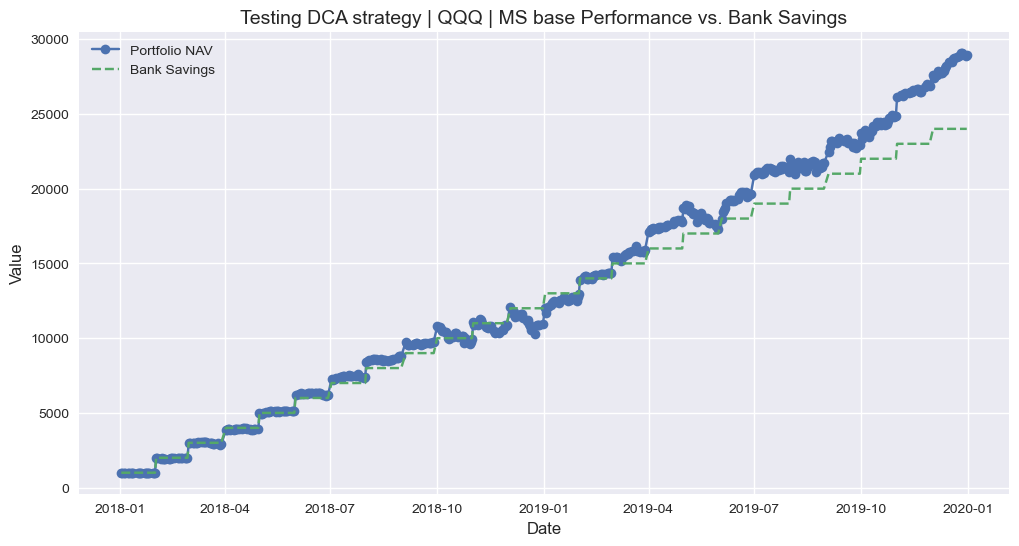


Running Strategy: SMA (20,50)
---------------------------------------------------------------------------
Testing SMA strategy | QQQ | SMA_S = 20 & SMA_L = 50
---------------------------------------------------------------------------
2018-01-02 | Deposit: +1000.0 | New Balance: 1000.0
2018-02-01 | Deposit: +1000.0 | New Balance: 2000.0
2018-03-01 | Deposit: +1000.0 | New Balance: 3000.0
2018-03-14 | Buying 18 share(s) at 163.51177 | New Balance: 56.79
2018-04-02 | Deposit: +1000.0 | New Balance: 1056.79
2018-04-05 | Selling 18 share(s) at 153.25466 | New Balance: 3815.37
2018-04-05 | Selling 24 share(s) at 153.25466 | New Balance: 7493.48
2018-05-01 | Deposit: +1000.0 | New Balance: 8493.48
2018-05-14 | Buying 24 share(s) at 161.93587 | New Balance: 4607.02
2018-05-14 | Buying 28 share(s) at 161.93587 | New Balance: 72.82
2018-06-01 | Deposit: +1000.0 | New Balance: 1072.82
2018-07-02 | Deposit: +1000.0 | New Balance: 2072.82
2018-08-01 | Deposit: +1000.0 | New Balance: 3072.82
2018-

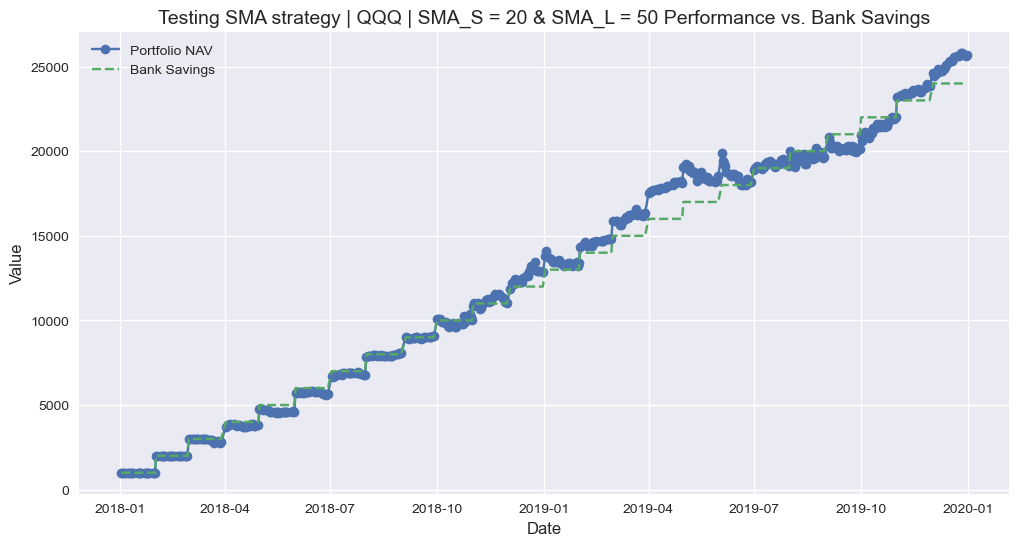


Running Strategy: EMA (20,50)
---------------------------------------------------------------------------
Testing EMA strategy | QQQ | EMA_S = 20 & EMA_L = 50
---------------------------------------------------------------------------
2018-01-02 | Deposit: +1000.0 | New Balance: 1000.0
2018-01-03 | Buying 6 share(s) at 152.4161 | New Balance: 85.5
2018-02-01 | Deposit: +1000.0 | New Balance: 1085.5
2018-03-01 | Deposit: +1000.0 | New Balance: 2085.5
2018-03-29 | Selling 6 share(s) at 152.75869 | New Balance: 3002.06
2018-03-29 | Selling 19 share(s) at 152.75869 | New Balance: 5904.47
2018-04-02 | Deposit: +1000.0 | New Balance: 6904.47
2018-05-01 | Deposit: +1000.0 | New Balance: 7904.47
2018-05-09 | Buying 19 share(s) at 160.15195 | New Balance: 4861.58
2018-05-09 | Buying 30 share(s) at 160.15195 | New Balance: 57.03
2018-06-01 | Deposit: +1000.0 | New Balance: 1057.03
2018-07-02 | Deposit: +1000.0 | New Balance: 2057.03
2018-08-01 | Deposit: +1000.0 | New Balance: 3057.03
2018-09-0

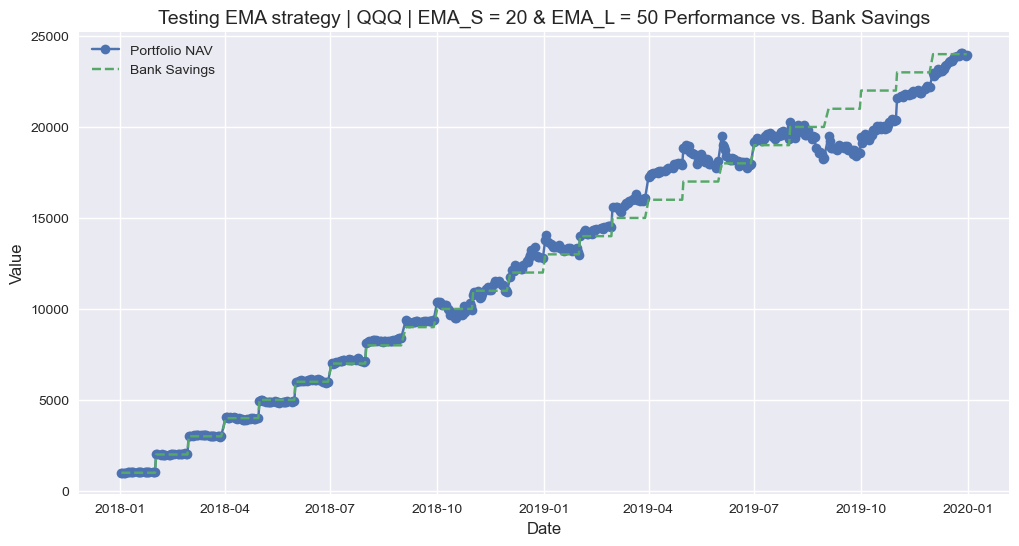


Running Strategy: MACD (12,26,9)
---------------------------------------------------------------------------
Testing MACD strategy | QQQ | Fast=12, Slow=26, Signal=9
---------------------------------------------------------------------------
2018-01-02 | Deposit: +1000.0 | New Balance: 1000.0
2018-01-03 | Buying 6 share(s) at 152.4161 | New Balance: 85.5
2018-02-01 | Deposit: +1000.0 | New Balance: 1085.5
2018-02-02 | Selling 6 share(s) at 156.77809 | New Balance: 2026.17
2018-02-02 | Selling 12 share(s) at 156.77809 | New Balance: 3907.51
2018-02-20 | Buying 12 share(s) at 157.4258 | New Balance: 2018.4
2018-02-20 | Buying 12 share(s) at 157.4258 | New Balance: 129.29
2018-03-01 | Deposit: +1000.0 | New Balance: 1129.29
2018-03-19 | Selling 12 share(s) at 159.40779 | New Balance: 3042.18
2018-03-19 | Selling 19 share(s) at 159.40779 | New Balance: 6070.93
2018-04-02 | Deposit: +1000.0 | New Balance: 7070.93
2018-04-12 | Buying 19 share(s) at 154.74297 | New Balance: 4130.81
2018-04-1

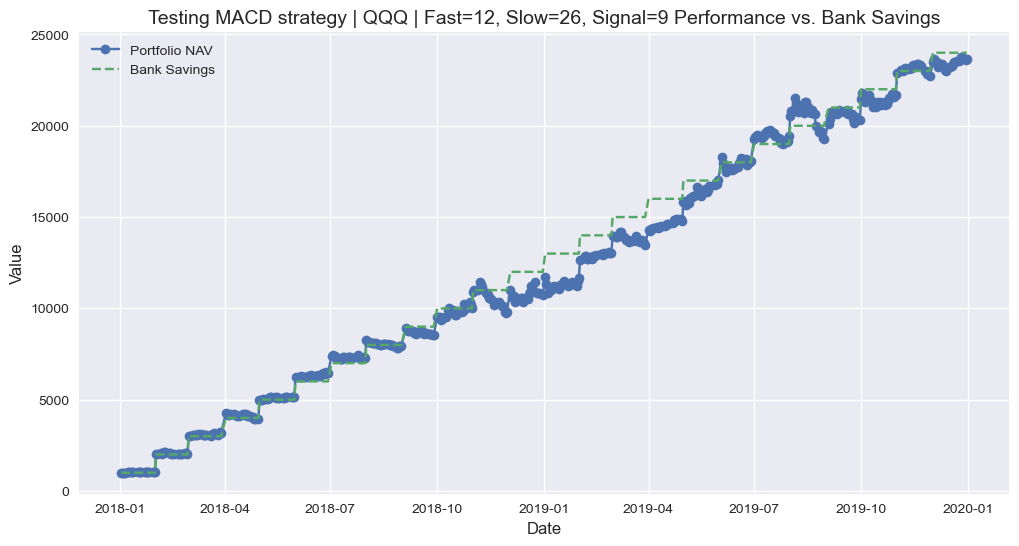


Running Strategy: RSI (14,30,70)
---------------------------------------------------------------------------
Testing RSI strategy | QQQ | Period=14, Oversold<30, Overbought>70
---------------------------------------------------------------------------
2018-01-02 | Deposit: +1000.0 | New Balance: 1000.0
2018-01-23 | Selling 6 share(s) at 161.44491 | New Balance: 1968.67
2018-02-01 | Deposit: +1000.0 | New Balance: 2968.67
2018-03-01 | Deposit: +1000.0 | New Balance: 3968.67
2018-04-02 | Deposit: +1000.0 | New Balance: 4968.67
2018-04-02 | Buying 6 share(s) at 148.35143 | New Balance: 4078.56
2018-04-02 | Buying 27 share(s) at 148.35143 | New Balance: 73.07
2018-05-01 | Deposit: +1000.0 | New Balance: 1073.07
2018-05-14 | Selling 27 share(s) at 161.93577 | New Balance: 5445.34
2018-05-14 | Selling 33 share(s) at 161.93577 | New Balance: 10789.22
2018-06-01 | Deposit: +1000.0 | New Balance: 11789.22
2018-07-02 | Deposit: +1000.0 | New Balance: 12789.22
2018-08-01 | Deposit: +1000.0 | New

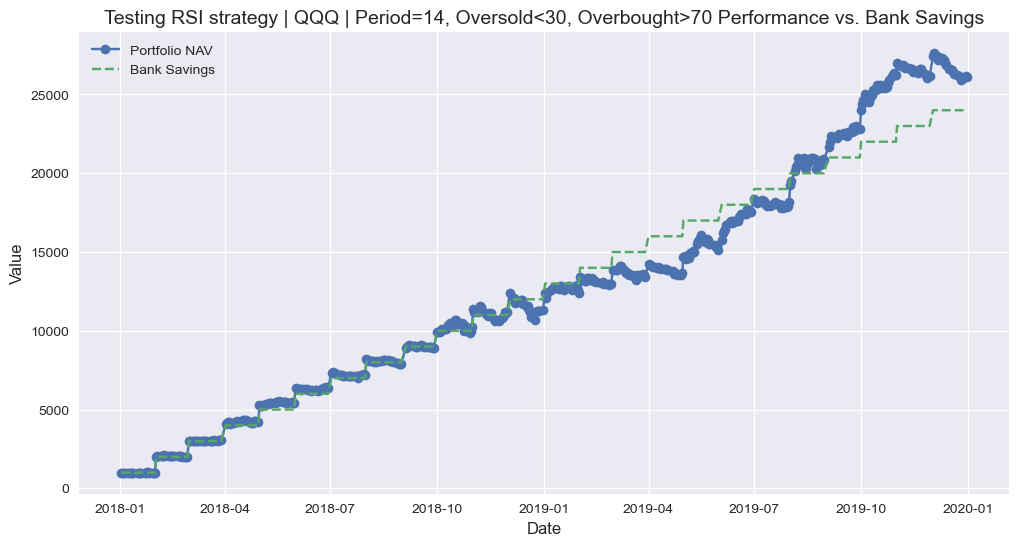


Running Strategy: Bollinger (20,2)
---------------------------------------------------------------------------
Testing Bollinger Bands strategy | QQQ | Window=20, Multiplier=2
---------------------------------------------------------------------------
2018-01-02 | Deposit: +1000.0 | New Balance: 1000.0
2018-02-01 | Deposit: +1000.0 | New Balance: 2000.0
2018-02-05 | Selling 13 share(s) at 150.59683 | New Balance: 3957.76
2018-03-01 | Deposit: +1000.0 | New Balance: 4957.76
2018-04-02 | Deposit: +1000.0 | New Balance: 5957.76
2018-05-01 | Deposit: +1000.0 | New Balance: 6957.76
2018-05-10 | Buying 13 share(s) at 161.81189 | New Balance: 4854.2
2018-05-10 | Buying 29 share(s) at 161.81189 | New Balance: 161.66
2018-06-01 | Deposit: +1000.0 | New Balance: 1161.66
2018-06-27 | Selling 29 share(s) at 162.26329 | New Balance: 5867.29
2018-06-27 | Selling 36 share(s) at 162.26329 | New Balance: 11708.77
2018-07-02 | Deposit: +1000.0 | New Balance: 12708.77
2018-08-01 | Deposit: +1000.0 | New

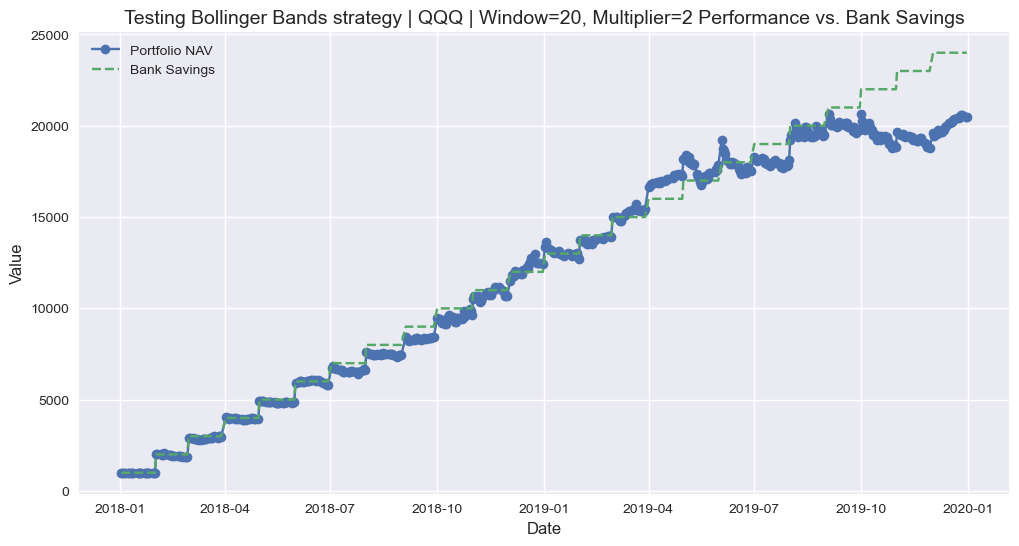


Running Strategy: Momentum (10)
---------------------------------------------------------------------------
Testing Momentum strategy | QQQ | Period=10
---------------------------------------------------------------------------
2018-01-02 | Deposit: +1000.0 | New Balance: 1000.0
2018-01-17 | Buying 6 share(s) at 157.902 | New Balance: 52.59
2018-02-01 | Deposit: +1000.0 | New Balance: 1052.59
2018-02-02 | Selling 6 share(s) at 156.77809 | New Balance: 1993.26
2018-02-02 | Selling 12 share(s) at 156.77809 | New Balance: 3874.59
2018-02-16 | Buying 12 share(s) at 157.11153 | New Balance: 1989.26
2018-02-16 | Buying 12 share(s) at 157.11153 | New Balance: 103.92
2018-03-01 | Deposit: +1000.0 | New Balance: 1103.92
2018-03-19 | Selling 12 share(s) at 159.40779 | New Balance: 3016.81
2018-03-19 | Selling 18 share(s) at 159.40779 | New Balance: 5886.15
2018-04-02 | Deposit: +1000.0 | New Balance: 6886.15
2018-04-11 | Buying 18 share(s) at 152.90183 | New Balance: 4133.92
2018-04-11 | Buying

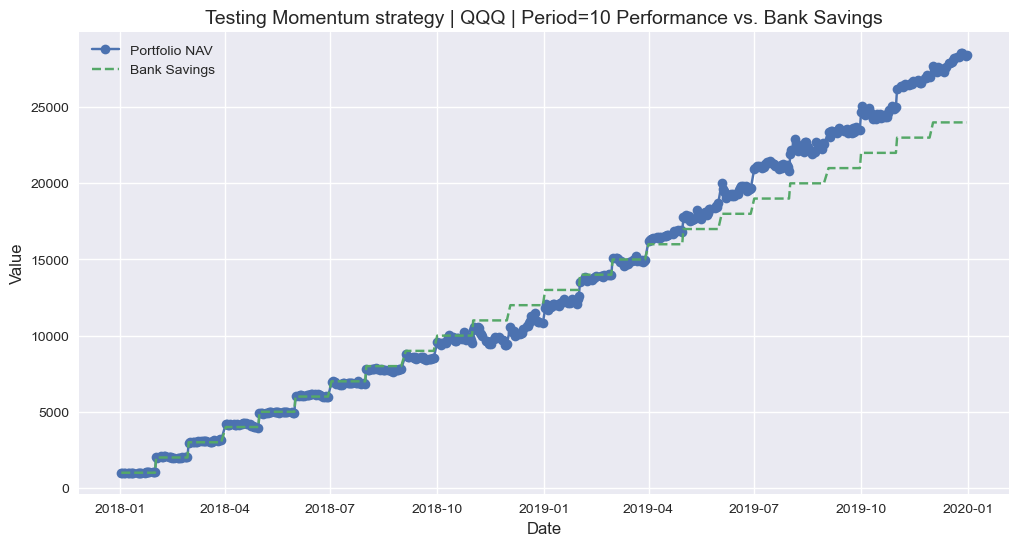


Running Strategy: ROC (10)
---------------------------------------------------------------------------
Testing ROC strategy | QQQ | Period=10
---------------------------------------------------------------------------
2018-01-02 | Deposit: +1000.0 | New Balance: 1000.0
2018-01-17 | Buying 6 share(s) at 157.902 | New Balance: 52.59
2018-02-01 | Deposit: +1000.0 | New Balance: 1052.59
2018-02-02 | Selling 6 share(s) at 156.77809 | New Balance: 1993.26
2018-02-02 | Selling 12 share(s) at 156.77809 | New Balance: 3874.59
2018-02-16 | Buying 12 share(s) at 157.11153 | New Balance: 1989.26
2018-02-16 | Buying 12 share(s) at 157.11153 | New Balance: 103.92
2018-03-01 | Deposit: +1000.0 | New Balance: 1103.92
2018-03-19 | Selling 12 share(s) at 159.40779 | New Balance: 3016.81
2018-03-19 | Selling 18 share(s) at 159.40779 | New Balance: 5886.15
2018-04-02 | Deposit: +1000.0 | New Balance: 6886.15
2018-04-11 | Buying 18 share(s) at 152.90183 | New Balance: 4133.92
2018-04-11 | Buying 27 share(

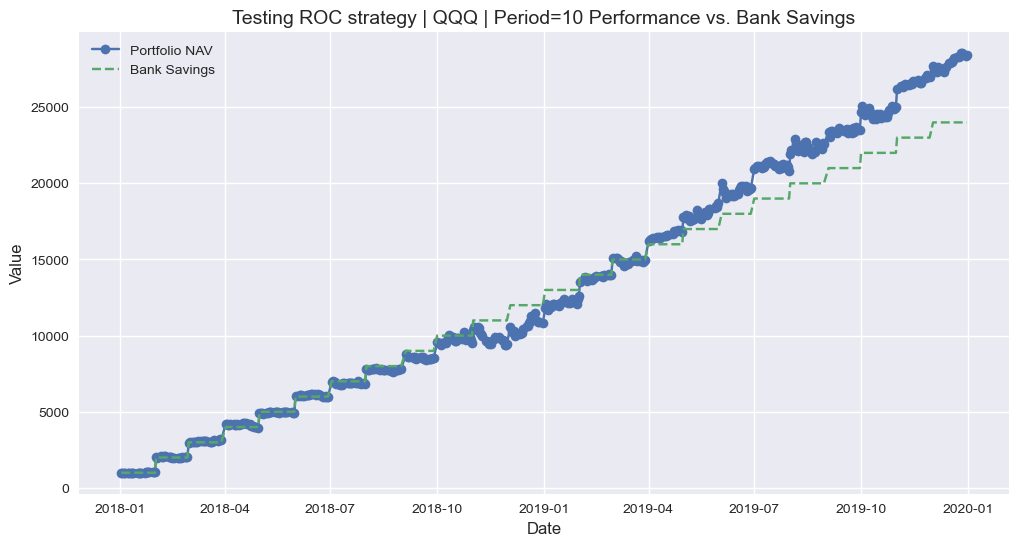


Running Strategy: Donchian (20)
---------------------------------------------------------------------------
Testing Donchian Channel strategy | QQQ | Channel Period=20
---------------------------------------------------------------------------
2018-01-02 | Deposit: +1000.0 | New Balance: 1000.0
2018-02-01 | Deposit: +1000.0 | New Balance: 2000.0
2018-03-01 | Deposit: +1000.0 | New Balance: 3000.0
2018-04-02 | Deposit: +1000.0 | New Balance: 4000.0
2018-05-01 | Deposit: +1000.0 | New Balance: 5000.0
2018-06-01 | Deposit: +1000.0 | New Balance: 6000.0
2018-07-02 | Deposit: +1000.0 | New Balance: 7000.0
2018-08-01 | Deposit: +1000.0 | New Balance: 8000.0
2018-09-04 | Deposit: +1000.0 | New Balance: 9000.0
2018-10-01 | Deposit: +1000.0 | New Balance: 10000.0
2018-11-01 | Deposit: +1000.0 | New Balance: 11000.0
2018-12-03 | Deposit: +1000.0 | New Balance: 12000.0
2019-01-02 | Deposit: +1000.0 | New Balance: 13000.0
2019-02-01 | Deposit: +1000.0 | New Balance: 14000.0
2019-03-01 | Deposit: 

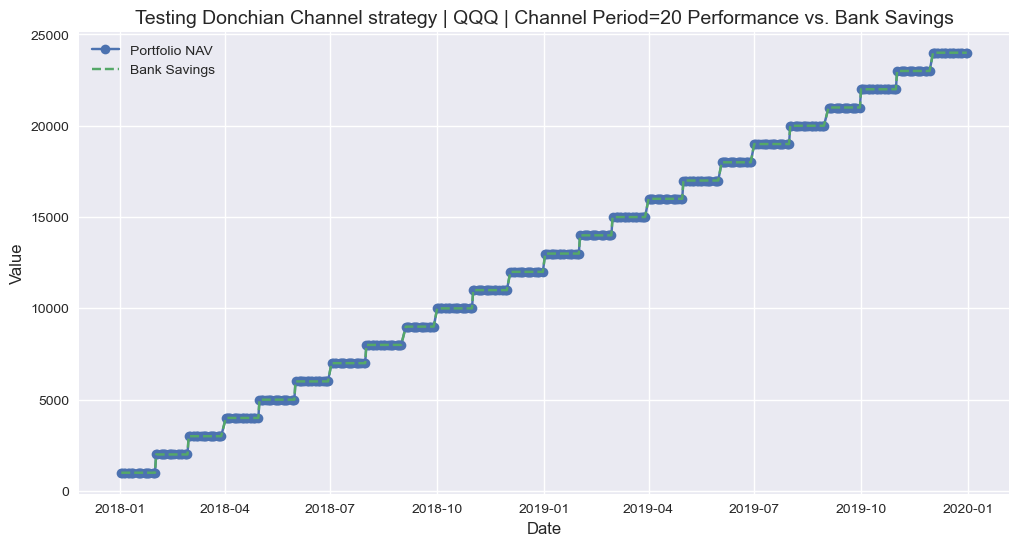


Running Strategy: Mean Reversion (20,1)
---------------------------------------------------------------------------
Testing Mean Reversion strategy | QQQ | Window=20, Threshold=1
---------------------------------------------------------------------------
2018-01-02 | Deposit: +1000.0 | New Balance: 1000.0
2018-01-31 | Selling 6 share(s) at 161.34014 | New Balance: 1968.04
2018-02-01 | Deposit: +1000.0 | New Balance: 2968.04
2018-02-05 | Buying 6 share(s) at 150.59693 | New Balance: 2064.46
2018-02-05 | Buying 13 share(s) at 150.59693 | New Balance: 106.7
2018-02-26 | Selling 13 share(s) at 162.29255 | New Balance: 2216.5
2018-02-26 | Selling 13 share(s) at 162.29255 | New Balance: 4326.31
2018-03-01 | Deposit: +1000.0 | New Balance: 5326.31
2018-03-22 | Buying 13 share(s) at 155.30582 | New Balance: 3307.33
2018-03-22 | Buying 21 share(s) at 155.30582 | New Balance: 45.91
2018-04-02 | Deposit: +1000.0 | New Balance: 1045.91
2018-04-17 | Selling 21 share(s) at 158.45379 | New Balance: 

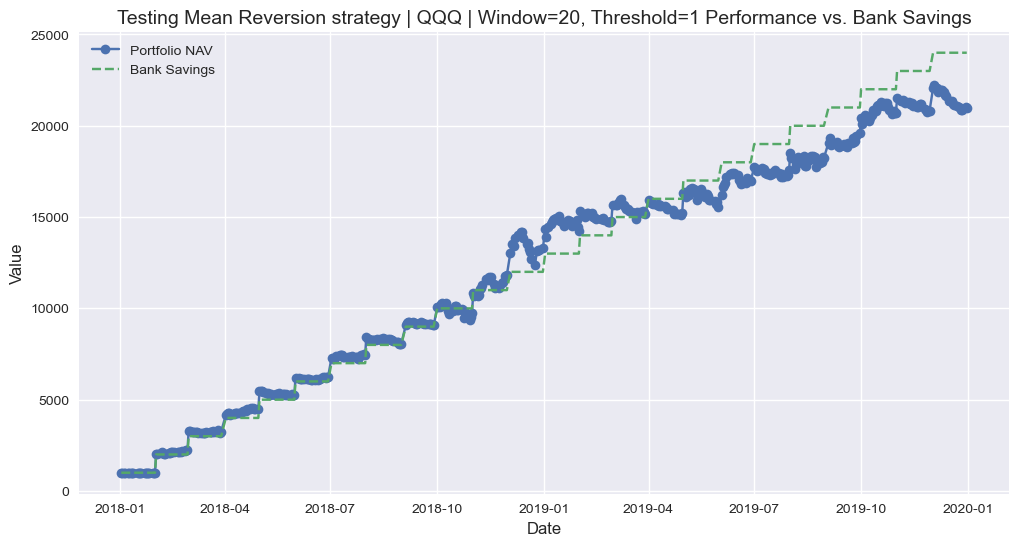

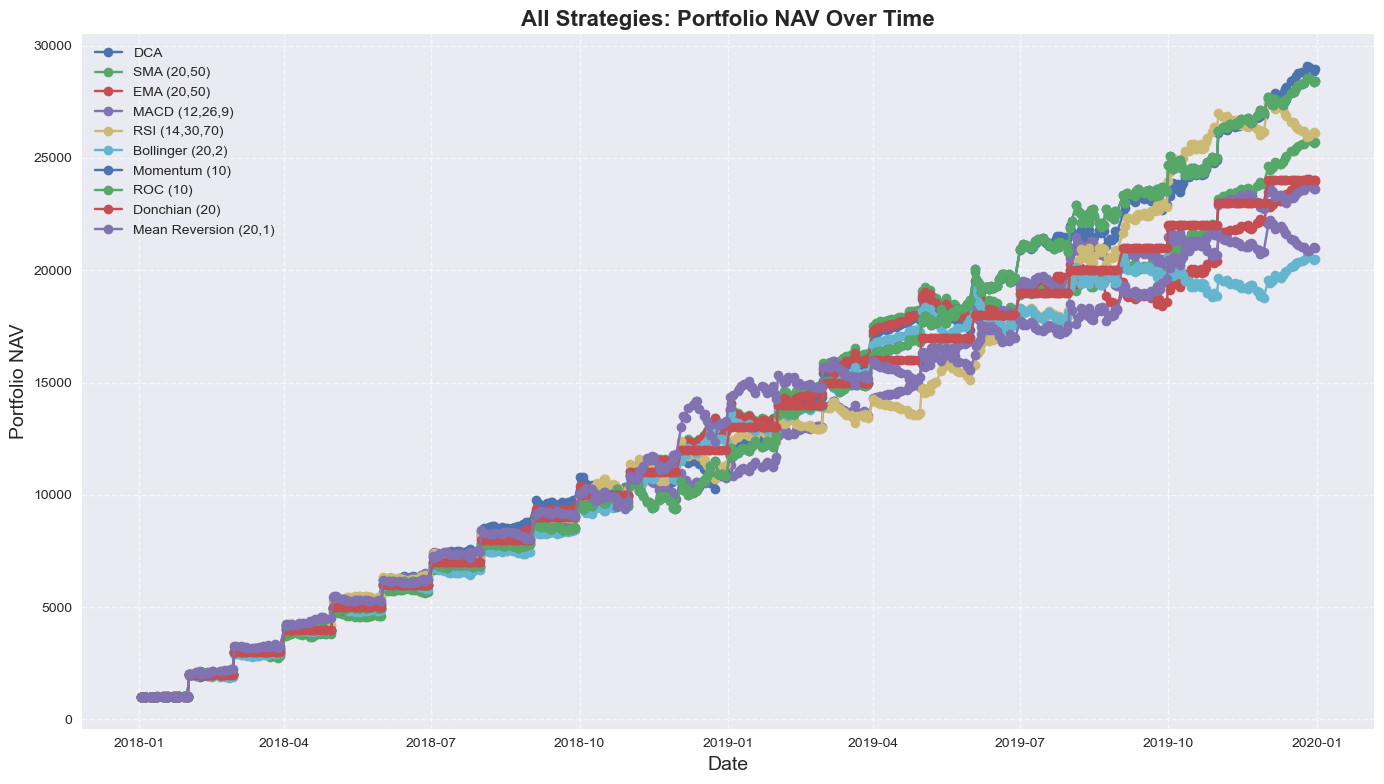

Strategy Performance Metrics:


,Sharpe ratio,CAGR,Win %,Avg. %,Avg. Win %,Avg. Loss %,Profit Factor,Max DD %,DD Duration,Recovery Factor
DCA,0.48,441.05%,56.37%,0.78%,1.97%,-0.82%,3.41,-15.07%,34 days,185.4
"SMA (20,50)",0.46,409.7%,50.6%,0.76%,2.11%,-0.76%,3.51,-9.6%,58 days,257.31
"EMA (20,50)",0.47,392.2%,55.38%,0.74%,1.93%,-0.73%,3.27,-9.96%,85 days,230.52
"MACD (12,26,9)",0.47,388.85%,52.99%,0.74%,2.13%,-0.82%,2.93,-14.73%,57 days,153.67
"RSI (14,30,70)",0.46,413.81%,48.61%,0.77%,2.27%,-0.69%,3.27,-13.83%,31 days,181.52
"Bollinger (20,2)",0.43,355.14%,47.21%,0.72%,2.3%,-0.75%,2.99,-10.2%,119 days,191.22
Momentum (10),0.48,436.15%,54.58%,0.78%,2.1%,-0.84%,3.13,-11.43%,29 days,239.82
ROC (10),0.48,436.15%,54.58%,0.78%,2.1%,-0.84%,3.13,-11.43%,29 days,239.82
Donchian (20),0.46,392.58%,4.58%,0.74%,16.24%,nan%,NaN,0.0%,0 days,NaN
"Mean Reversion (20,1)",0.45,360.33%,48.21%,0.72%,2.28%,-0.8%,2.88,-12.75%,53 days,156.68


In [173]:
# ------------------------------------------------------------------------------
# Driver Code: Run all strategies and plot each performance in a grid.
#
# We will run each strategy with plot_nav disabled so that individual figures do
# not appear. Then we plot all the performance comparisons (Portfolio NAV vs. Bank Savings)
# in one figure with a grid of subplots.
# ------------------------------------------------------------------------------


# Set global parameters for quick modifications.
symbol = "QQQ"
start = "2018-01-01"
end = "2020-01-01"
monthly_deposite = 1000

results = {}  # Dictionary to store simulation results for each strategy

# Dictionary mapping strategy names to lambda functions that run each simulation.
strategies = {
    "DCA": lambda: IterativeBacktest(symbol, start, end, monthly_deposite).test_DCA_strategy(plot_nav=True),
    "SMA (20,50)": lambda: IterativeBacktest(symbol, start, end, monthly_deposite).test_sma_strategy(20, 50, plot_nav=True),
    "EMA (20,50)": lambda: IterativeBacktest(symbol, start, end, monthly_deposite).test_ema_strategy(20, 50, plot_nav=True),
    "MACD (12,26,9)": lambda: IterativeBacktest(symbol, start, end, monthly_deposite).test_macd_strategy(fast=12, slow=26, signal_period=9, plot_nav=True),
    "RSI (14,30,70)": lambda: IterativeBacktest(symbol, start, end, monthly_deposite).test_rsi_strategy(period=14, oversold=30, overbought=70, plot_nav=True),
    "Bollinger (20,2)": lambda: IterativeBacktest(symbol, start, end, monthly_deposite).test_bollinger_strategy(window=20, multiplier=2, plot_nav=True),
    "Momentum (10)": lambda: IterativeBacktest(symbol, start, end, monthly_deposite).test_momentum_strategy(period=10, plot_nav=True),
    "ROC (10)": lambda: IterativeBacktest(symbol, start, end, monthly_deposite).test_roc_strategy(period=10, plot_nav=True),
    "Donchian (20)": lambda: IterativeBacktest(symbol, start, end, monthly_deposite).test_donchian_strategy(channel_period=20, plot_nav=True),
    "Mean Reversion (20,1)": lambda: IterativeBacktest(symbol, start, end, monthly_deposite).test_mean_reversion_strategy(window=20, threshold=1, plot_nav=True),
}

# Run each strategy and store its results.
for strat_name, func in strategies.items():
    print(f"\nRunning Strategy: {strat_name}")
    result = func()  # Each returns a dictionary of results.
    results[strat_name] = result

# -----------------------------------------------
# 1. Plot ALL Strategies' NAV Histories in One Plot
# -----------------------------------------------
plt.figure(figsize=(14, 8))
for strat_name, res in results.items():
    plt.plot(res['nav_dates'], res['nav_history'], marker='o', label=strat_name)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Portfolio NAV", fontsize=14)
plt.title("All Strategies: Portfolio NAV Over Time", fontsize=16, fontweight="bold")
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# -----------------------------------------------
# 2. Compute Metrics and Display as a DataFrame Table
# -----------------------------------------------
metrics_dict = {}
for strat_name, res in results.items():
    metrics_dict[strat_name] = compute_metrics(res['nav_dates'], res['nav_history'])

# Create a DataFrame; rows = strategies, columns = metric names
metric_df = pd.DataFrame(metrics_dict).T

# Print the metrics DataFrame to the console (if desired)
print("Strategy Performance Metrics:")
metric_df

## What did you know about the Trump's first term?
Backtesting from 2018 to 2021 showed DCA yielding a 24.8% gain over bank savings, with a Sharpe ratio of 0.48 and a recovery factor of 124.03. It indicating resilience against volatility. 

# **Conclusion**

I abserve that there are similar pattern on Trump first and second term, which inspire me that somehing happen before maybe occur on the future next 4 years. In term of strategies, DCA show a potential on capture the violocity of the market, So i will try on develop a machine learning model to enhance DCA strategy.